# 2. Data Preprocessing

In [ ]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

## 2.1. Define a Pre-processing Function

In [ ]:
# define a function for image pre-processing
def preproc(img, gray = False):
    
    '''Apply pre-processing steps on images including
       resizing, brightness adjustment, scaling, changing
       to gray scale based on user input
    '''
    if gray == False:
        # resize image to smaller size
        img = cv2.resize(img, dsize = (128, 128), interpolation = cv2.INTER_CUBIC)
        # adjust brightness and contrast
        #alpha = 1.2
        beta = 0.5
        img = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
        # scale the pixel values
        img = img / 255
    if gray == True:
        # resize image to smaller size
        img = cv2.resize(img, dsize = (128, 128), interpolation = cv2.INTER_CUBIC)
        # adjust brightness and contrast
        alpha = 1.2
        beta = 0.5
        img = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
        # change to gray scale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # scale the pixel values
        img = img / 255
        
    return img        

In [ ]:
# run the preprocessing function on a test image
test_dir = '..\\data\\Augmentation_excercise\\test'
file_list = os.listdir(test_dir)
file_list[-1]

'image (1).JPG'

(256, 256, 3) [152 148 160]


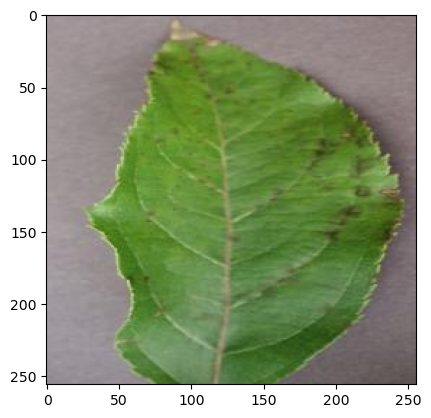

In [ ]:
img = cv2.imread(os.path.join(test_dir, file_list[-1]))
print(img.shape, img[0][0])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(128, 128, 3) [0.59607843 0.58039216 0.62745098]


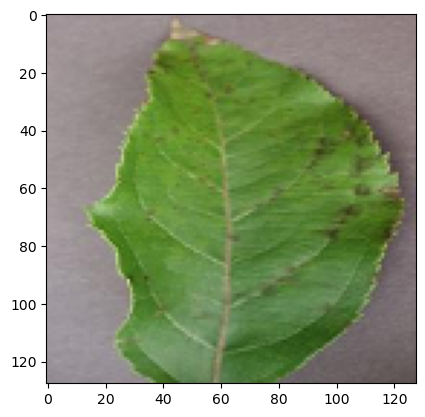

In [ ]:
# after preprocessing
img_pp = preproc(img)
print(img_pp.shape, img_pp[0][0])
plt.imshow(cv2.cvtColor(img_pp.astype(np.float32), cv2.COLOR_BGR2RGB))
plt.show()

(128, 128) 0.596078431372549


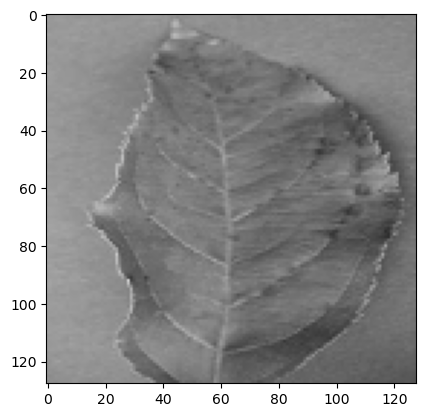

In [ ]:
# after preprocessing to gray scale
img_ppg = preproc(img, gray=True)
print(img_ppg.shape, img_ppg[0][0])
plt.imshow(cv2.cvtColor(img_ppg.astype(np.float32), cv2.COLOR_BGR2RGB))
plt.show()

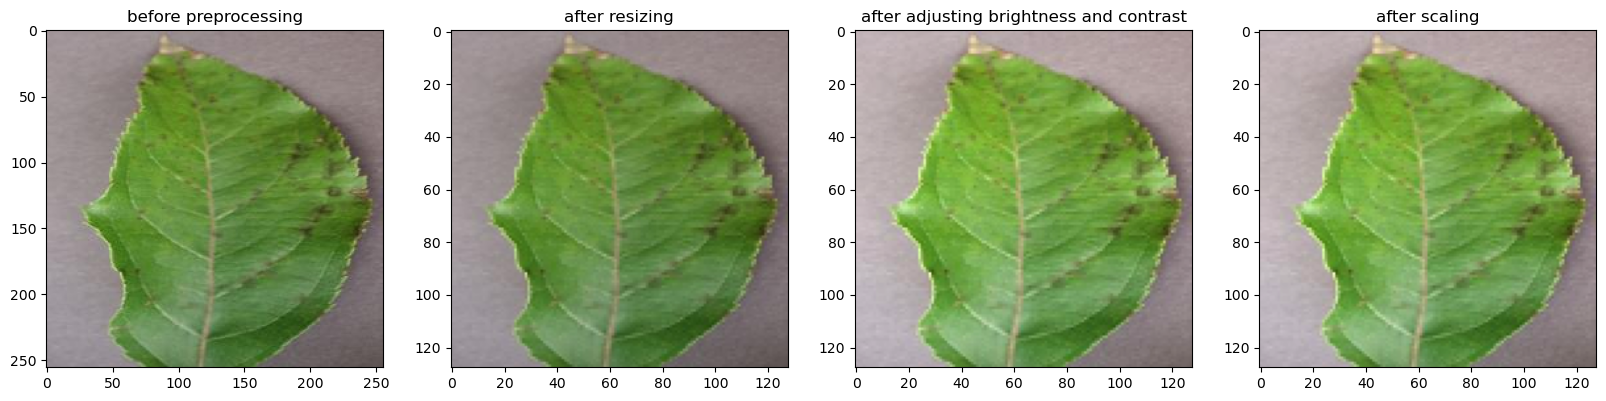

In [7]:
# display images after each step (no gray scale)
img_pp_1 = cv2.resize(img, dsize = (128, 128), interpolation = cv2.INTER_CUBIC)
alpha = 1.2
beta = 0.5
img_pp_2 = cv2.addWeighted(img_pp_1, alpha, np.zeros(img_pp_1.shape, img_pp_1.dtype), 0, beta)
img_pp_3 = img_pp_2 / 255
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_pp_1, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(img_pp_2, cv2.COLOR_BGR2RGB))
ax[3].imshow(cv2.cvtColor(img_pp_3.astype(np.float32), cv2.COLOR_BGR2RGB))
ax[0].title.set_text('before preprocessing')
ax[1].title.set_text('after resizing')
ax[2].title.set_text('after adjusting brightness and contrast')
ax[3].title.set_text('after scaling')

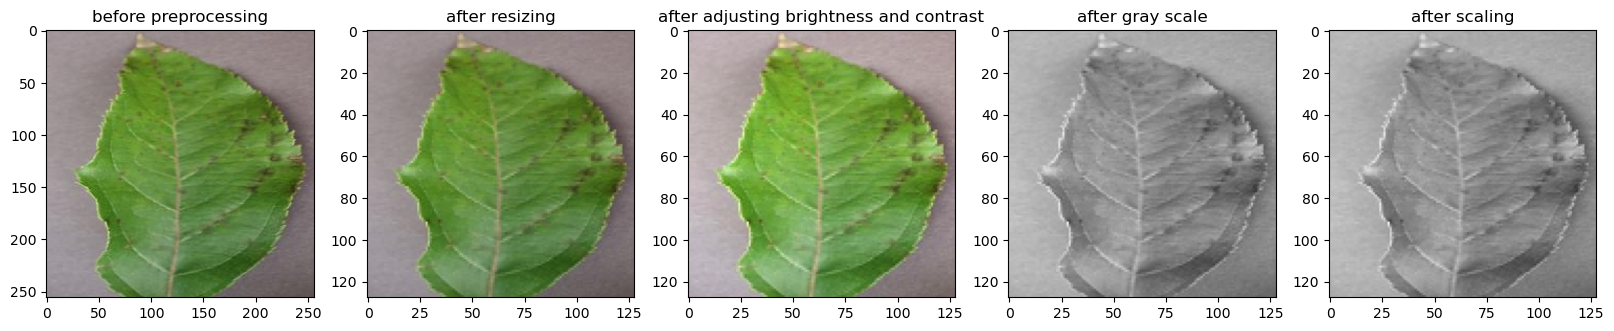

In [8]:
# display images after each step (gray scale)
img_ppg_1 = cv2.resize(img, dsize = (128, 128), interpolation = cv2.INTER_CUBIC)
alpha = 1.2
beta = 0.5
img_ppg_2 = cv2.addWeighted(img_ppg_1, alpha, np.zeros(img_ppg_1.shape, img_ppg_1.dtype), 0, beta)
img_ppg_3 = cv2.cvtColor(img_ppg_2, cv2.COLOR_BGR2GRAY)
img_ppg_4 = img_ppg_3 / 255
fig, ax = plt.subplots(ncols = 5, figsize = (20, 20))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_ppg_1, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(img_ppg_2, cv2.COLOR_BGR2RGB))
ax[3].imshow(cv2.cvtColor(img_ppg_3, cv2.COLOR_BGR2RGB))
ax[4].imshow(cv2.cvtColor(img_ppg_4.astype(np.float32), cv2.COLOR_BGR2RGB))
ax[0].title.set_text('before preprocessing')
ax[1].title.set_text('after resizing')
ax[2].title.set_text('after adjusting brightness and contrast')
ax[3].title.set_text('after gray scale')
ax[4].title.set_text('after scaling')

## 2.2. Evaluate Images Before and After Pre-processing
To make sure key features are kept after pre-processing

In [9]:
def structureqc(imgb4, imgaf, afcolor = True):
    if afcolor == True:
        bgr_imgb4 = cv2.split(imgb4)
        size = bgr_imgb4[0].shape
        up_imgaf = cv2.resize(imgaf, size)
        bgr_imgaf = cv2.split(up_imgaf)
        ssim_list = []
        for i in range(3):
            b_imgb4 = bgr_imgb4[i]
            b_imgaf = bgr_imgaf[i]
            mse = mean_squared_error(b_imgb4, b_imgaf)
            ssim_val = ssim(b_imgb4, b_imgaf)
            ssim_list.append(ssim_val)
            print(f'For channel {i}: MSE is {mse} and SSIM is {ssim_val}')
        return sum(ssim_list)/len(ssim_list)
    else:
        bgr_imgb4 = cv2.split(imgb4)
        size = bgr_imgb4[0].shape
        up_imgaf = cv2.resize(imgaf, size)
        ssim_list = []
        for i in range(3):
            b_imgb4 = bgr_imgb4[i]
            b_imgaf = up_imgaf
            mse = mean_squared_error(b_imgb4, b_imgaf)
            ssim_val = ssim(b_imgb4, b_imgaf)
            ssim_list.append(ssim_val)
            print(f'For channel {i}: MSE is {mse} and SSIM is {ssim_val}')
        return sum(ssim_list)/len(ssim_list)

In [10]:
# check mse and ssim for no processing
structureqc(img, img)

For channel 0: MSE is 0.0 and SSIM is 1.0
For channel 1: MSE is 0.0 and SSIM is 1.0
For channel 2: MSE is 0.0 and SSIM is 1.0


1.0

In [11]:
# check mse and ssim for after processing (not gray scale)
structureqc(img, img_pp*255)

For channel 0: MSE is 423.7015480995178 and SSIM is 0.9396559239875723
For channel 1: MSE is 747.7981562614441 and SSIM is 0.9384500614869857
For channel 2: MSE is 604.2293617725372 and SSIM is 0.9383374162289927


C:\Users\wfei2\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


0.938814467234517

In [12]:
# check mse and ssim for after processing (gray scale)
structureqc(img, img_ppg*255, afcolor = False)

For channel 0: MSE is 3955.0560204982758 and SSIM is 0.7282241207780927
For channel 1: MSE is 446.2011830806732 and SSIM is 0.9283118795231099
For channel 2: MSE is 1162.1912686824799 and SSIM is 0.8918988750926437


0.8494782917979488

## 2.3. Evaluation of Pre-processing for All Images

In [13]:
# define a new function without the print output to calculate ssim
# also can handle irregular shape images
def ssimcal(imgb4, imgaf, afcolor = True):
    if afcolor == True:
        bgr_imgb4 = cv2.split(imgb4)
        width = int(imgb4.shape[1])
        height = int(imgb4.shape[0])
        dim = (width, height)
        up_imgaf = cv2.resize(imgaf, dim)
        bgr_imgaf = cv2.split(up_imgaf)
        ssim_list = []
        for i in range(3):
            b_imgb4 = bgr_imgb4[i]
            b_imgaf = bgr_imgaf[i]
            mse = mean_squared_error(b_imgb4, b_imgaf)
            ssim_val = ssim(b_imgb4, b_imgaf)
            ssim_list.append(ssim_val)
            #print(f'For channel {i}: MSE is {mse} and SSIM is {ssim_val}')
        return sum(ssim_list)/len(ssim_list)
    else:
        bgr_imgb4 = cv2.split(imgb4)
        width = int(imgb4.shape[1])
        height = int(imgb4.shape[0])
        dim = (width, height)
        up_imgaf = cv2.resize(imgaf, dim)
        ssim_list = []
        for i in range(3):
            b_imgb4 = bgr_imgb4[i]
            b_imgaf = up_imgaf
            mse = mean_squared_error(b_imgb4, b_imgaf)
            ssim_val = ssim(b_imgb4, b_imgaf)
            ssim_list.append(ssim_val)
            #print(f'For channel {i}: MSE is {mse} and SSIM is {ssim_val}')
        return sum(ssim_list)/len(ssim_list)

In [14]:
# define the folder for data augmentation
data_dir = '..\\data\\Plant_leave_diseases_dataset_without_augmentation'
os.listdir(data_dir)

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 '

In [37]:
# will perform preprocessing (without gray scale) for all images in each class folder
# save out the minimum ssim for each class

class_list = []
pp_ssim_list = []

for image_class in os.listdir(data_dir):
        class_list.append(image_class)
        ssim_list = []

    # loop over each image to calculate ssim of before and after preprocessing
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                img_pp = preproc(img)
                ssim_pp = ssimcal(img, img_pp*255) 
                ssim_list.append(ssim_pp)
            except:
                print(f'Image loading issue: {image_path}')
        pp_ssim_list.append(ssim_list)

pp_ssim_dict = dict(zip(class_list, pp_ssim_list))

C:\Users\wfei2\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [40]:
len(pp_ssim_dict.keys())

39

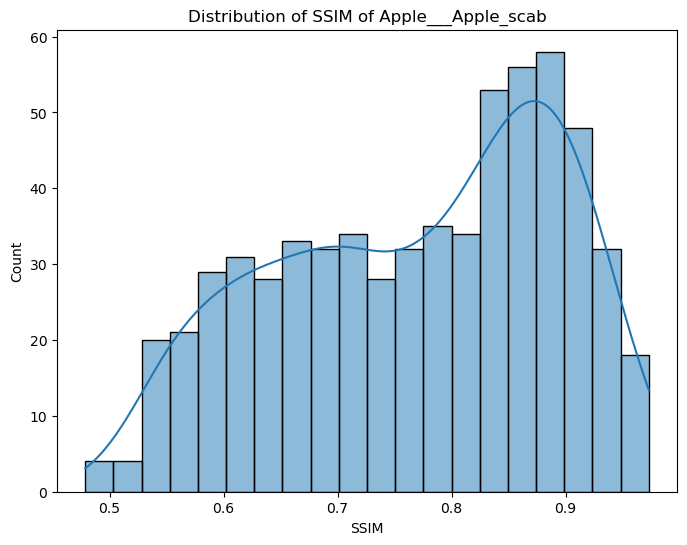

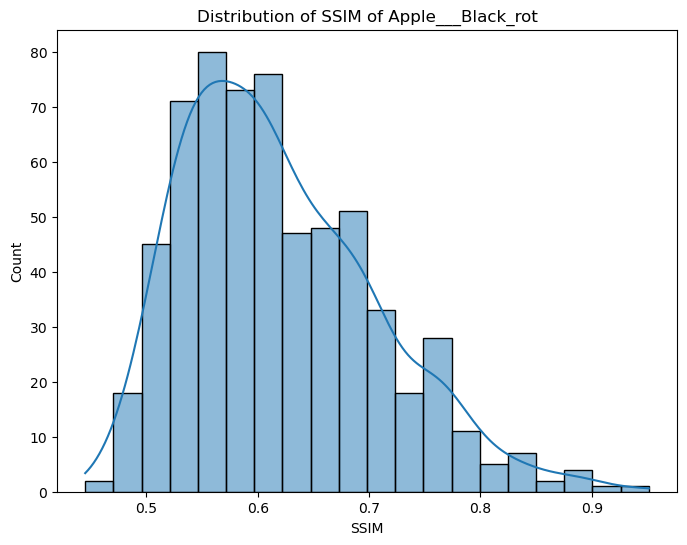

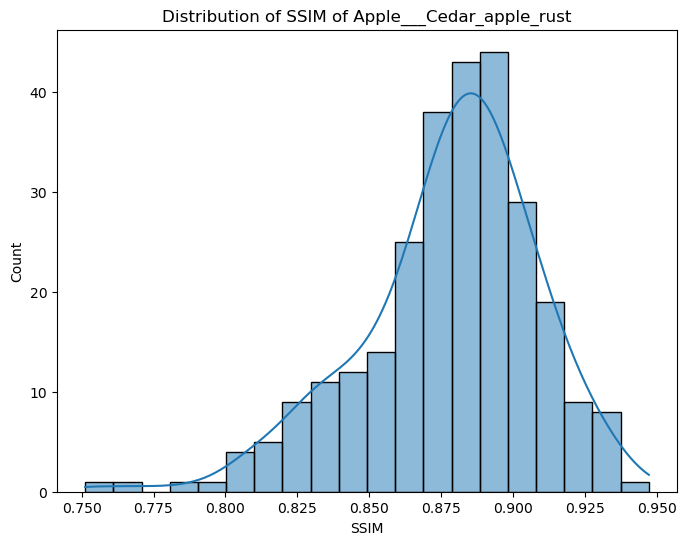

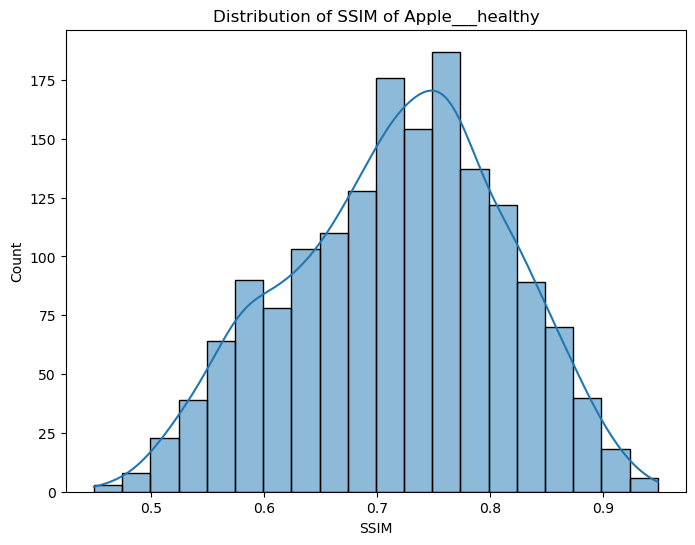

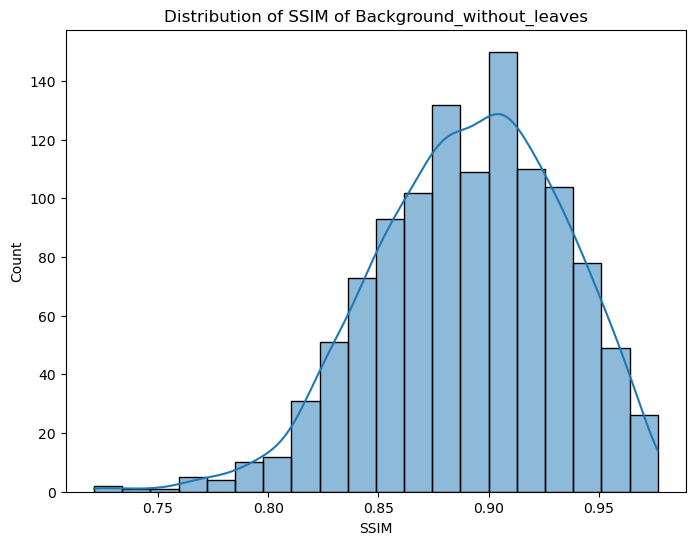

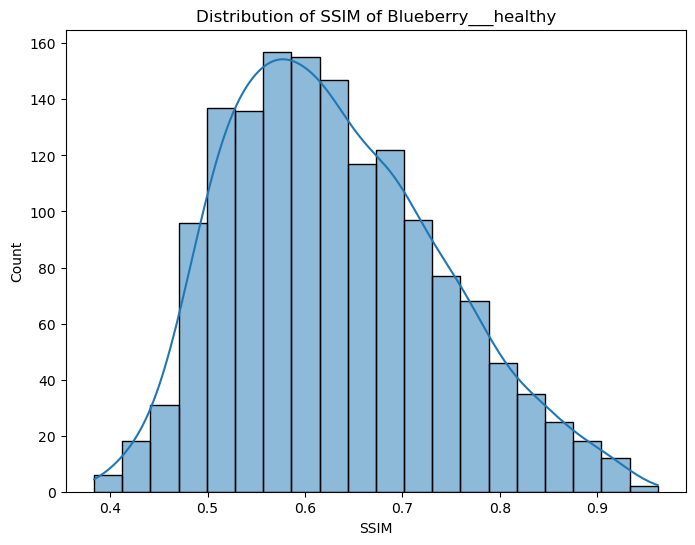

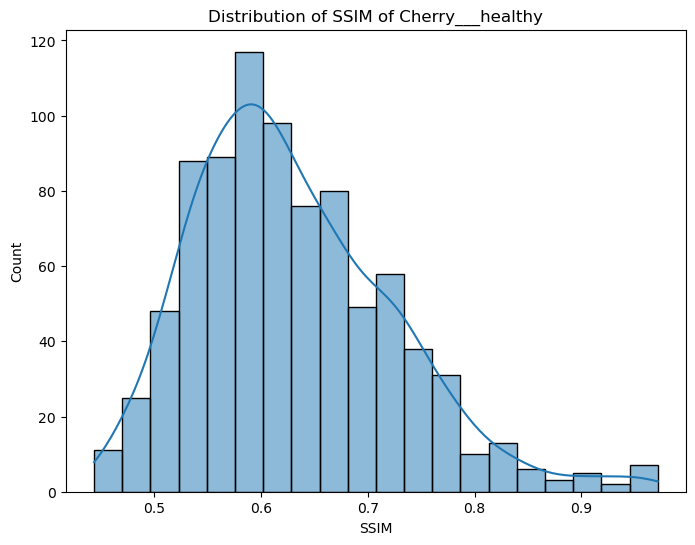

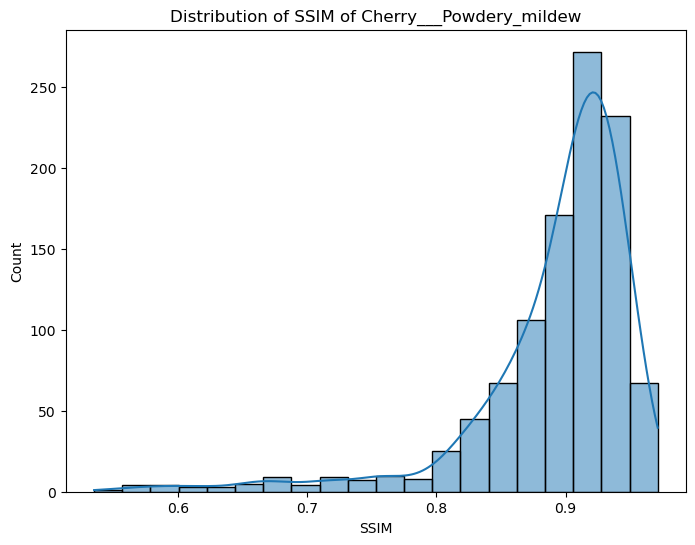

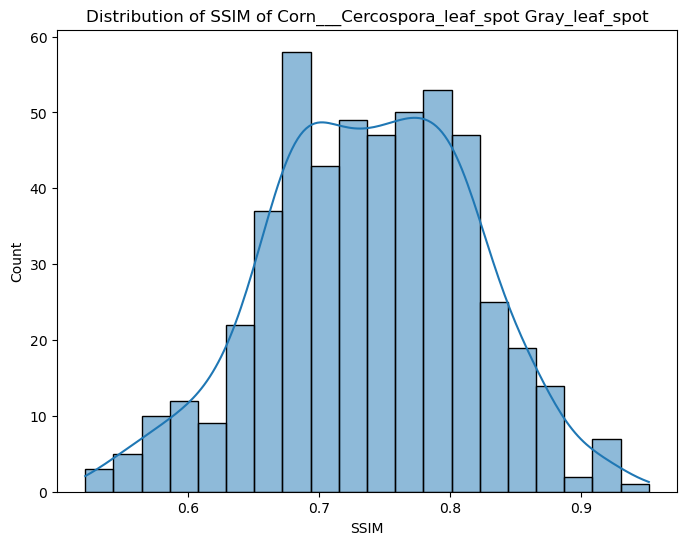

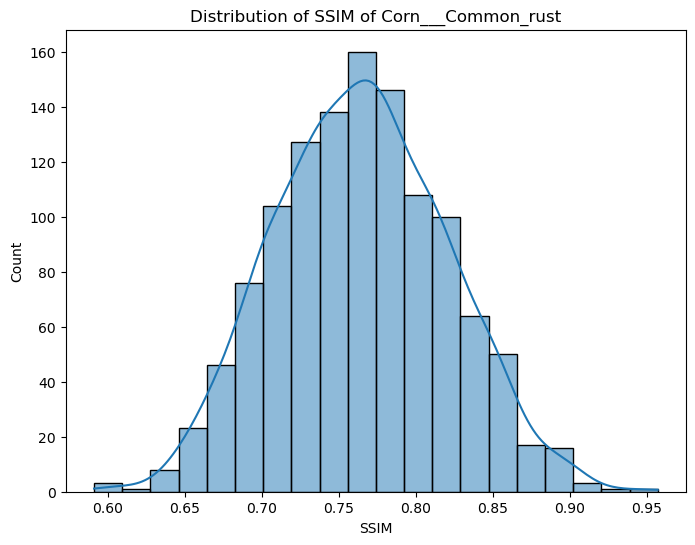

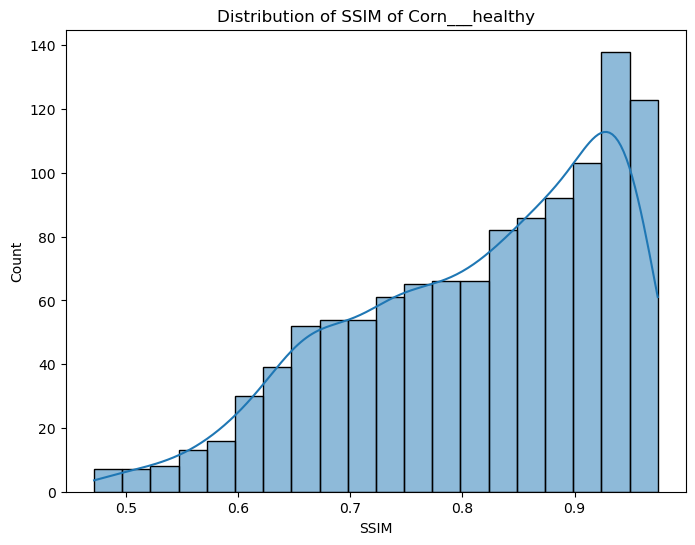

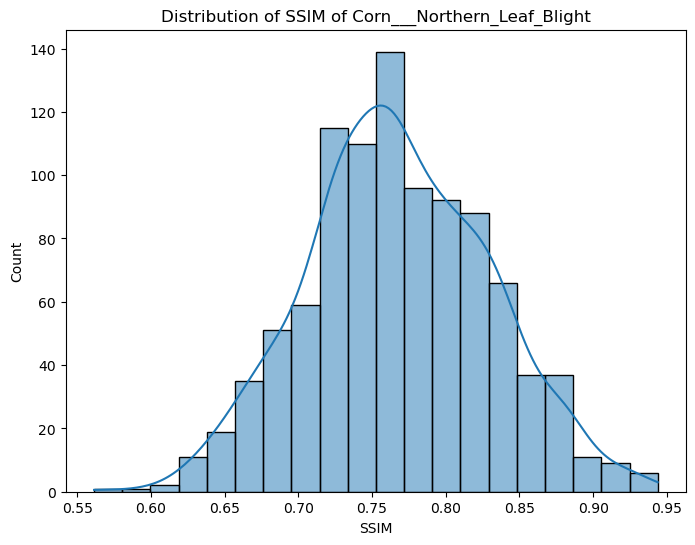

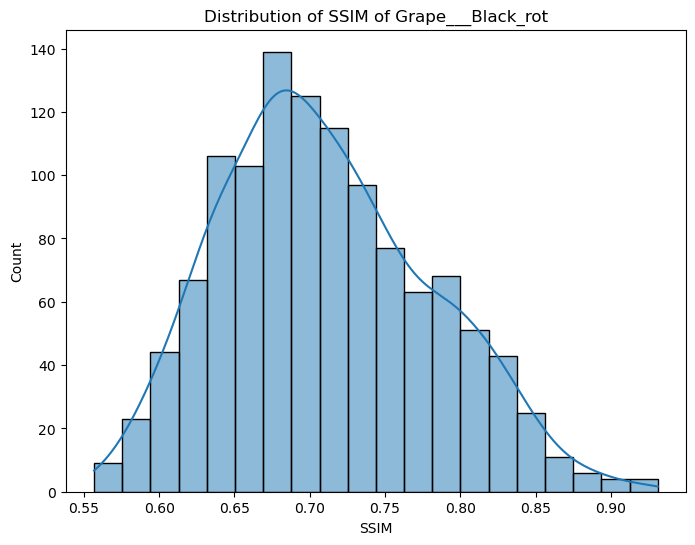

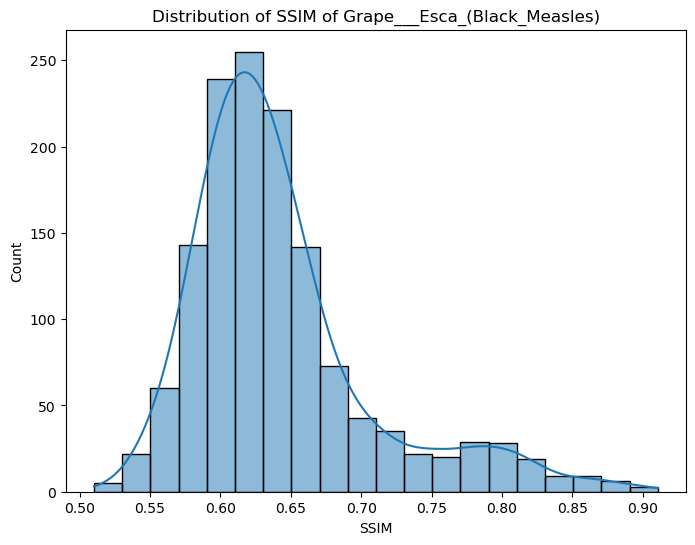

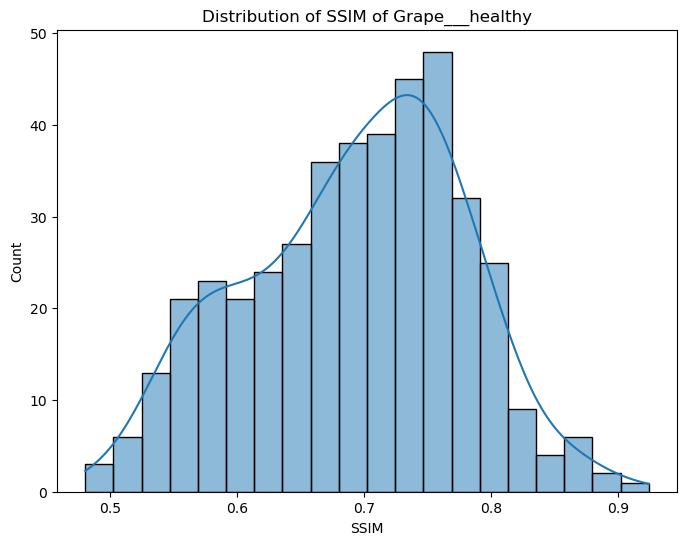

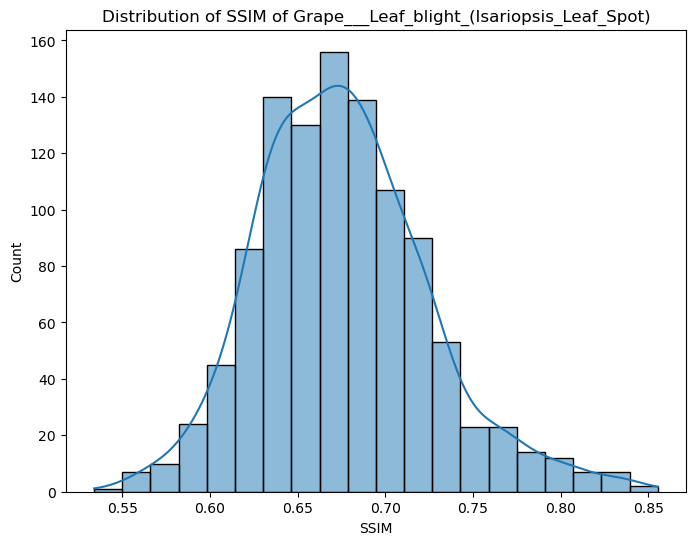

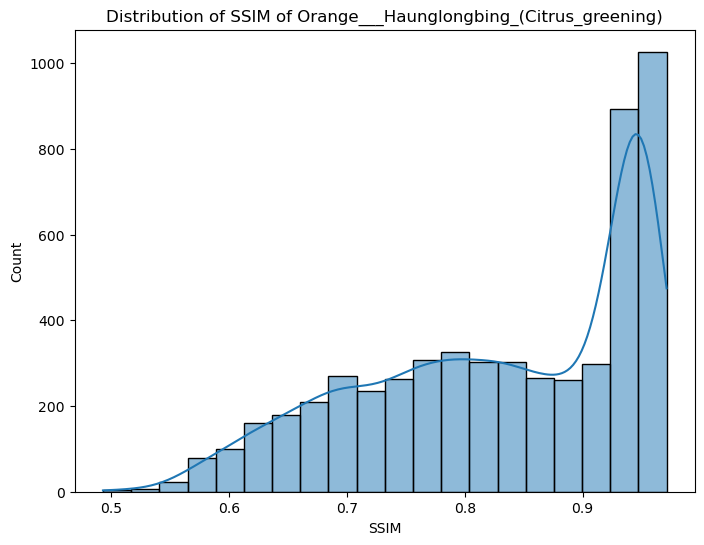

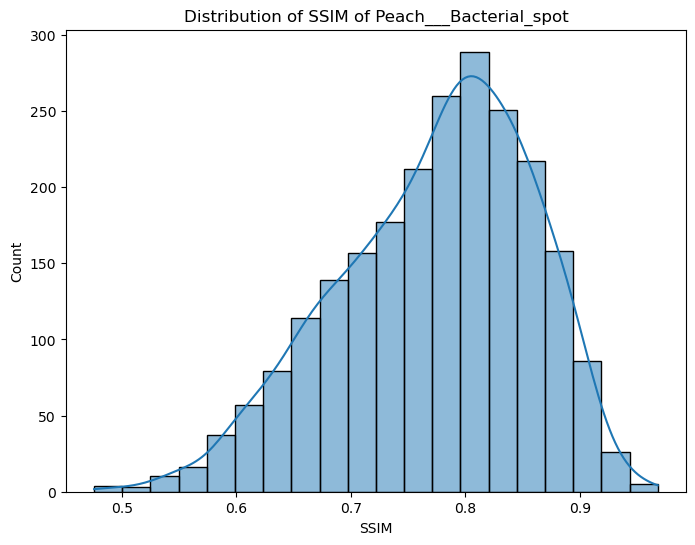

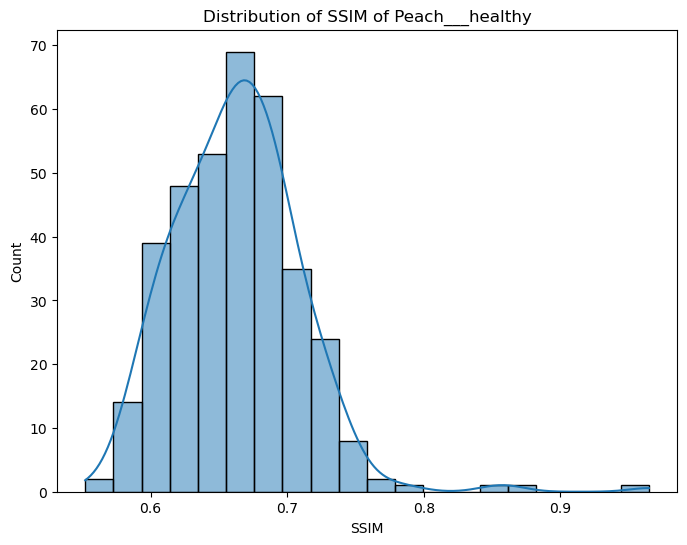

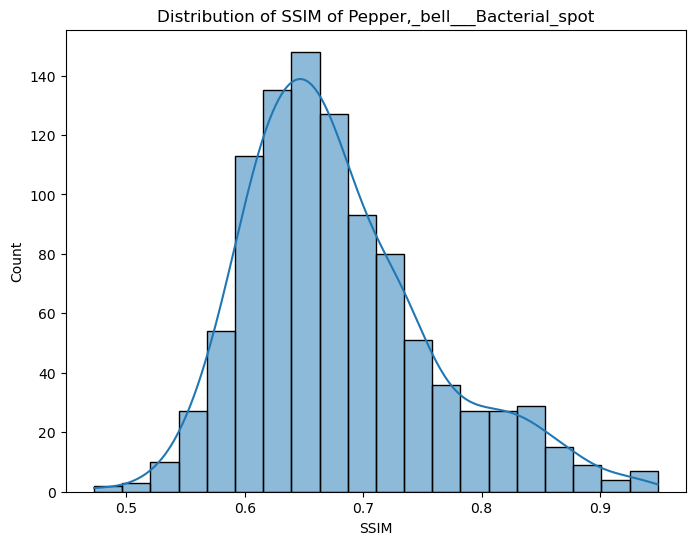

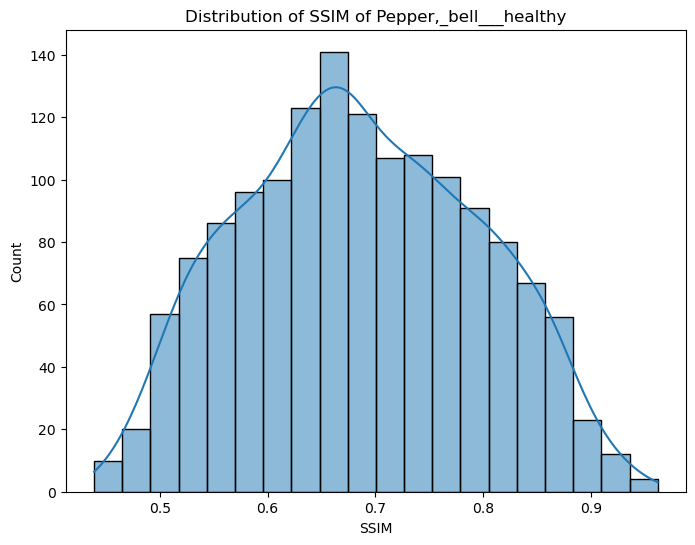

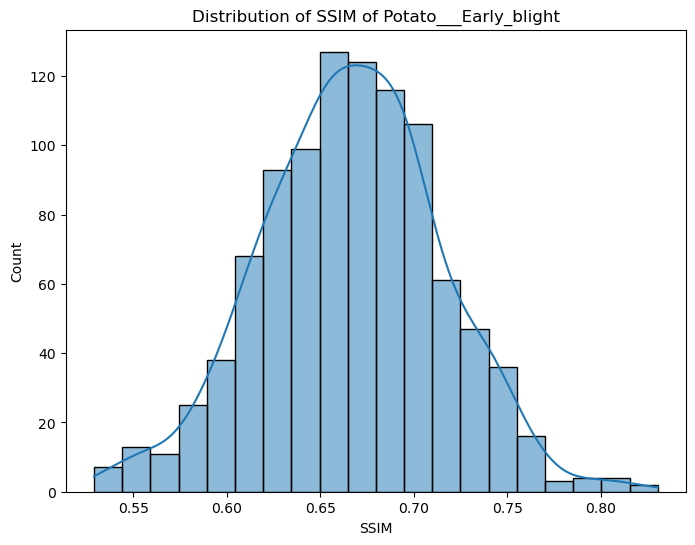

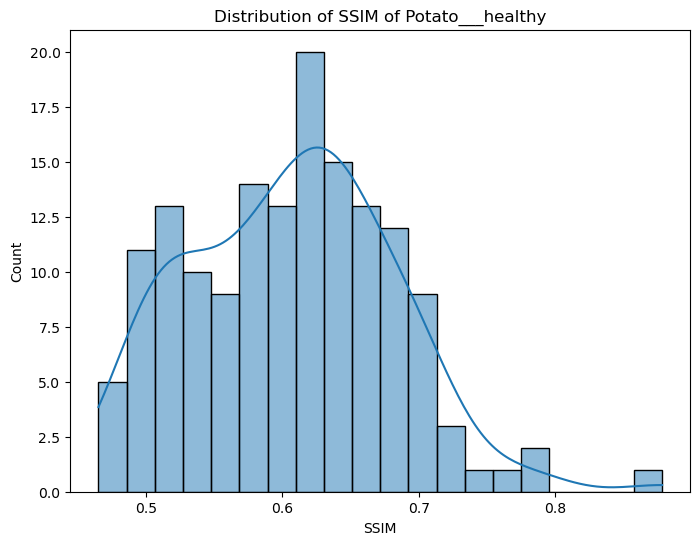

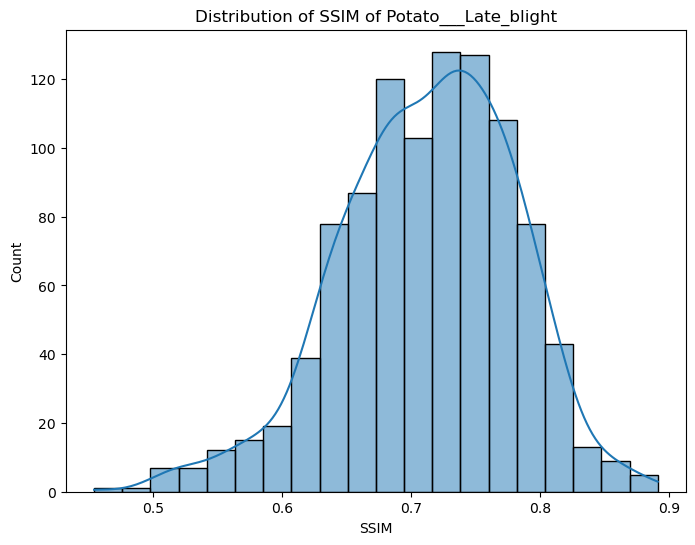

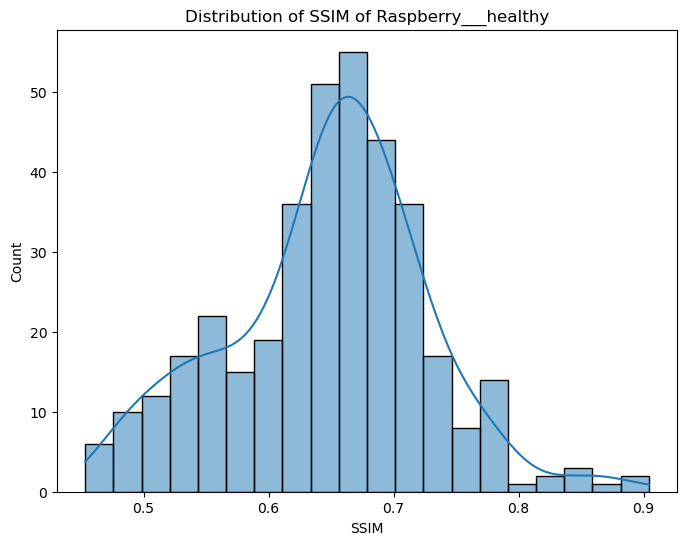

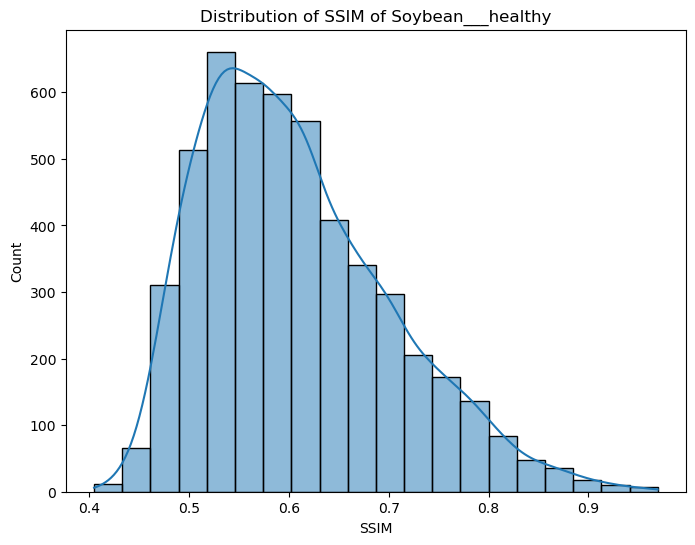

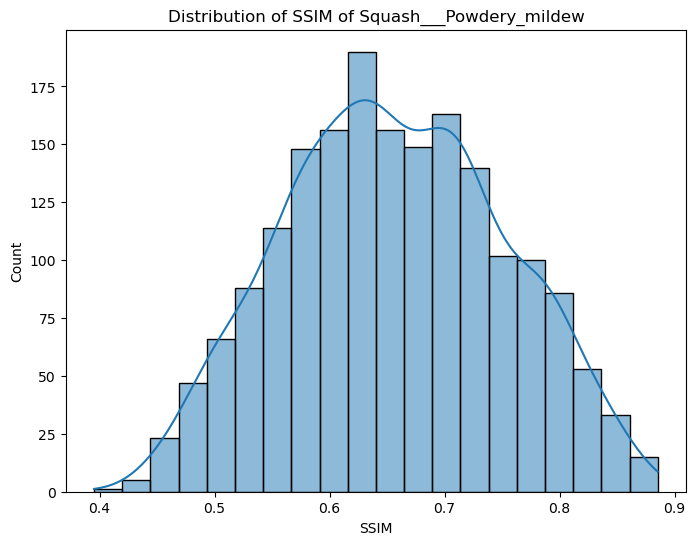

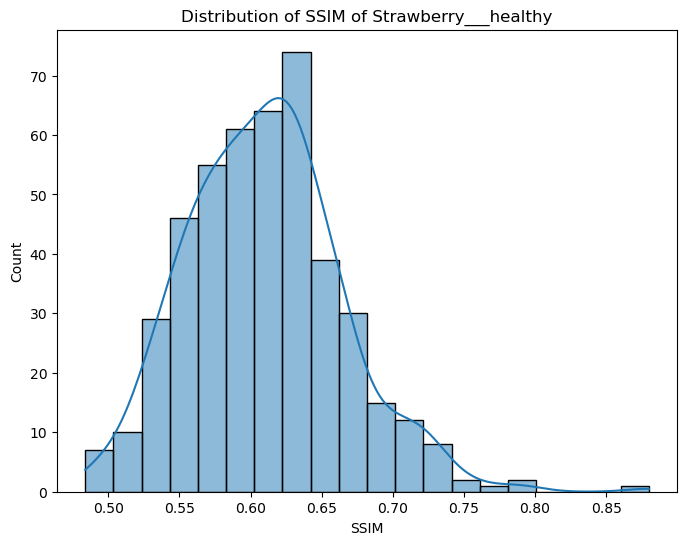

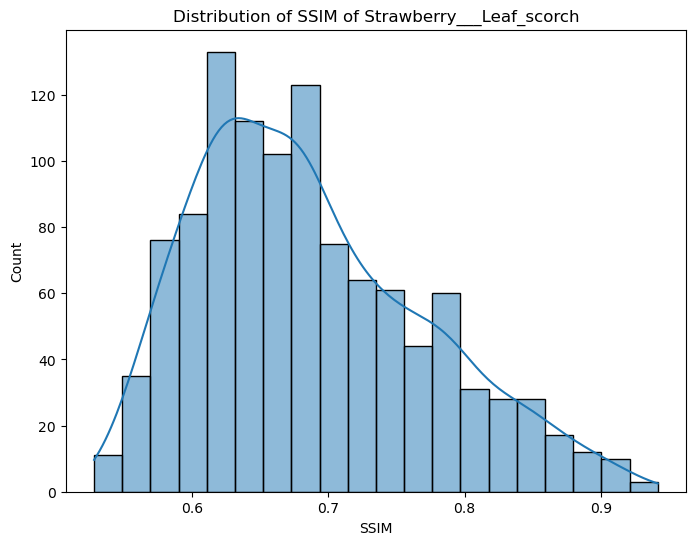

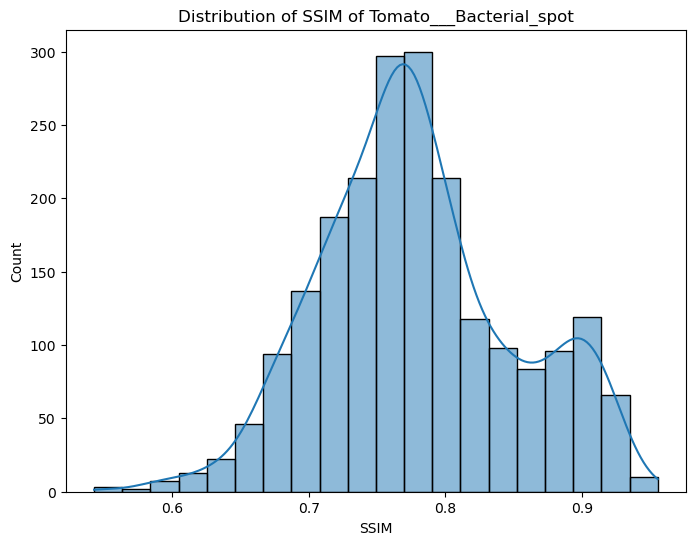

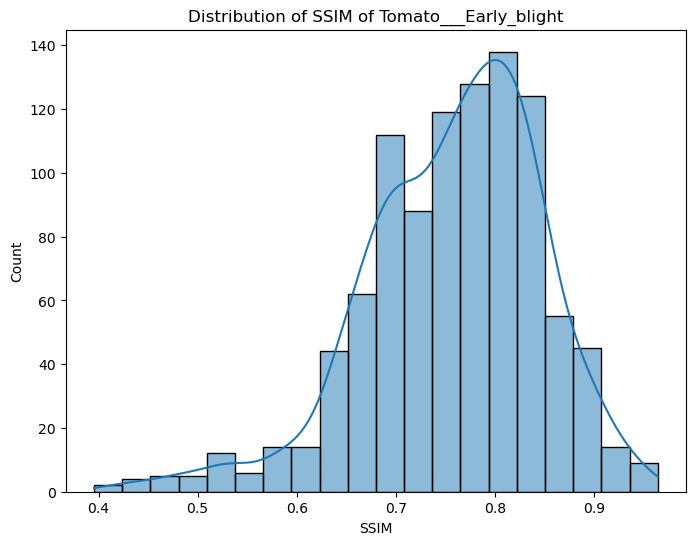

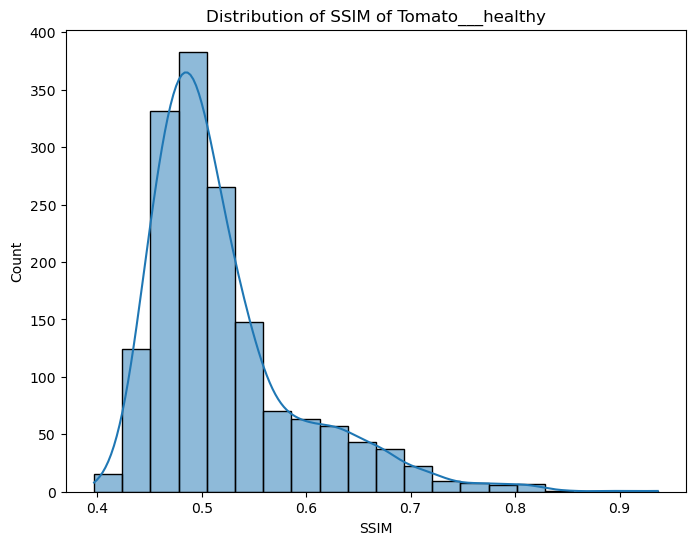

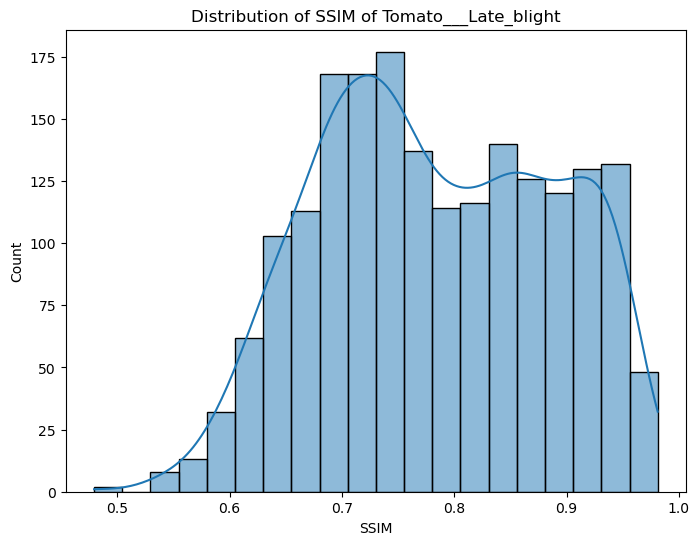

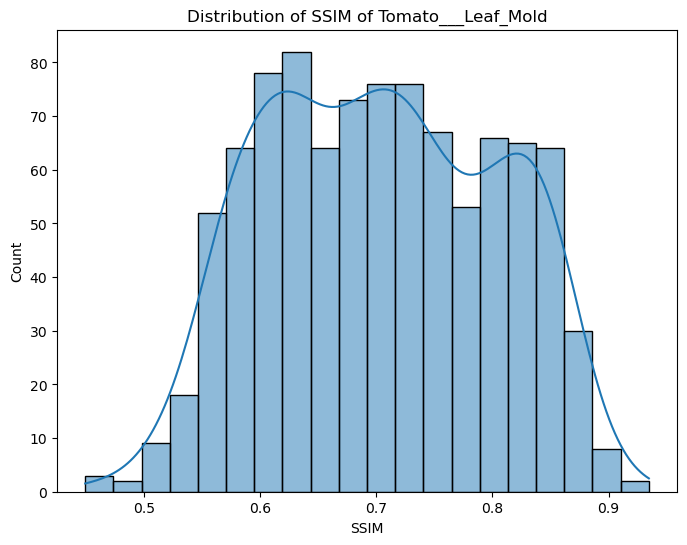

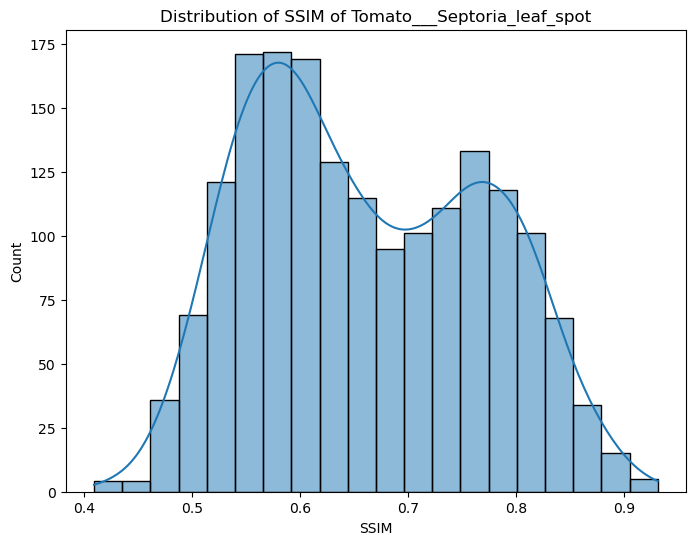

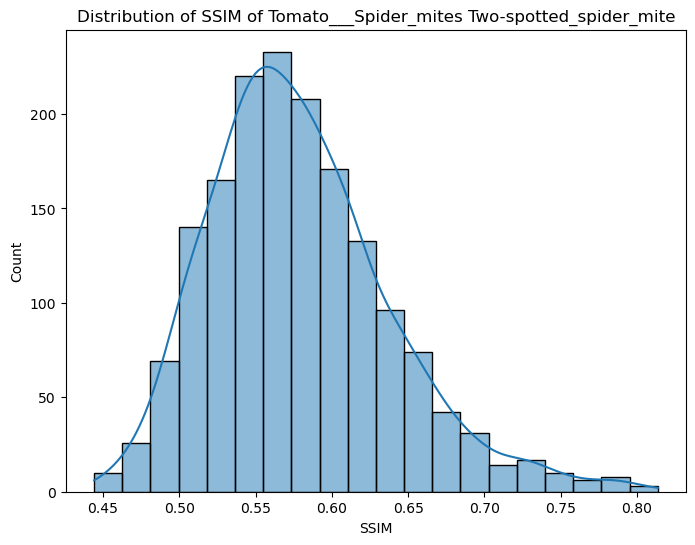

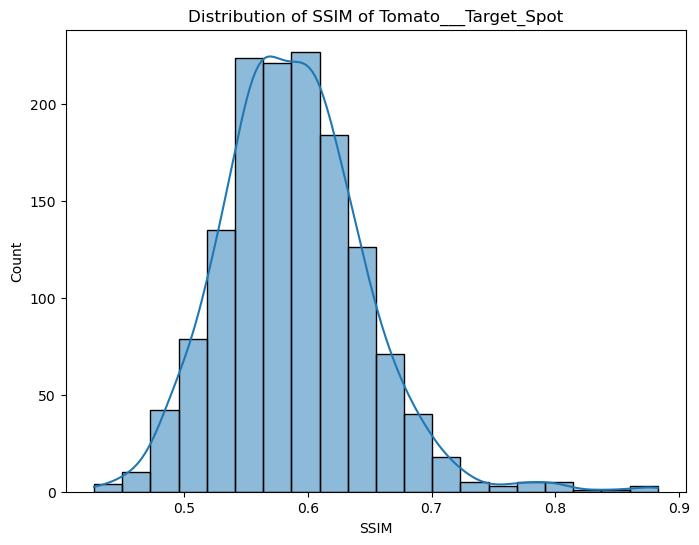

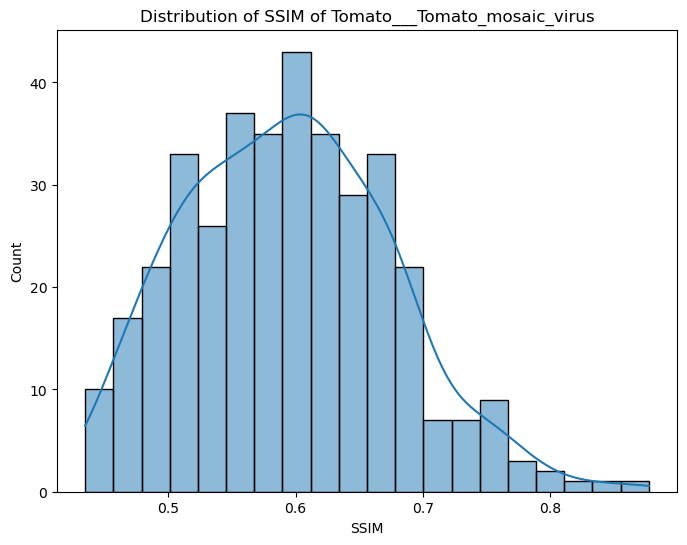

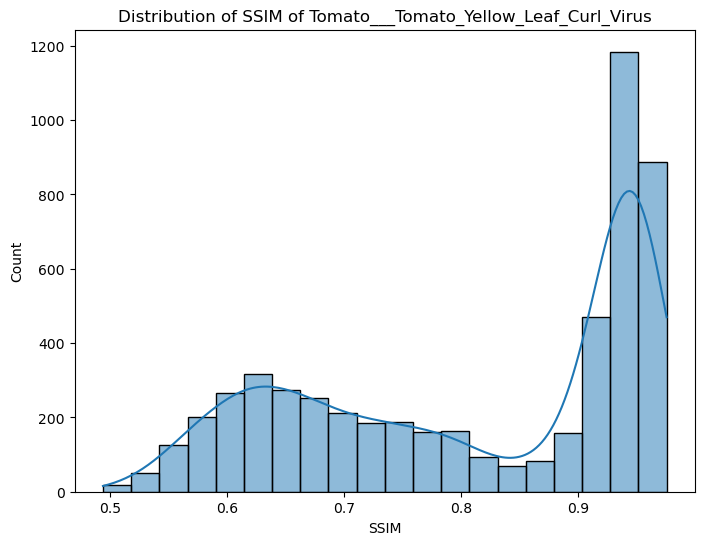

In [46]:
import seaborn as sns

for item in pp_ssim_dict.keys():
    plt.figure(figsize=(8, 6))
    sns.histplot(pp_ssim_dict[item], label = item, kde = True, alpha = 0.5, bins = 20)
    plt.title(f'Distribution of SSIM of {item}')
    plt.xlabel('SSIM')
    plt.show()

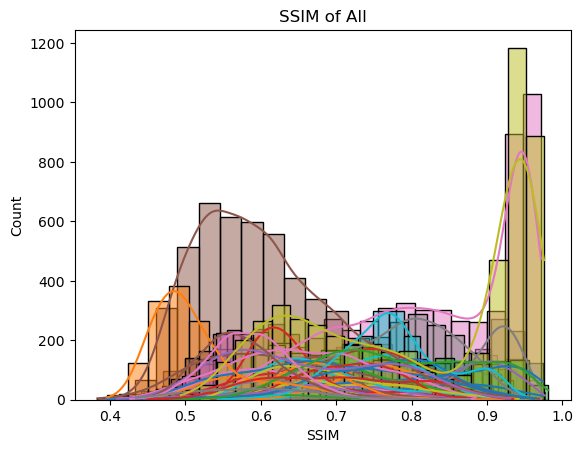

In [45]:
for item in pp_ssim_dict.keys():
    sns.histplot(pp_ssim_dict[item], label = item, kde = True, alpha = 0.5, bins = 20)
plt.title('SSIM of All')
plt.xlabel('SSIM')
plt.show()

In [50]:
# will perform preprocessing (gray scale) for all images in each class folder
# save out the minimum ssim for each class

class_list = []
ppg_ssim_list = []

for image_class in os.listdir(data_dir):
        class_list.append(image_class)
        ssim_list = []
    
    # loop over each image to calculate ssim of before and after preprocessing
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                img_ppg = preproc(img, gray = True)
                ssim_ppg = ssimcal(img, img_ppg*255, afcolor = False) 
                ssim_list.append(ssim_ppg)
            except:
                print(f'Image loading issue: {image_path}')
        ppg_ssim_list.append(ssim_list)

ppg_ssim_dict = dict(zip(class_list, ppg_ssim_list))

C:\Users\wfei2\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [51]:
len(ppg_ssim_dict.keys())

39

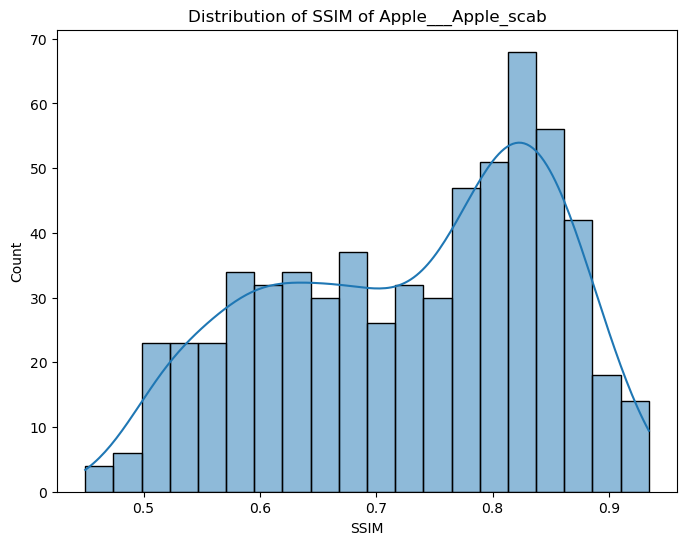

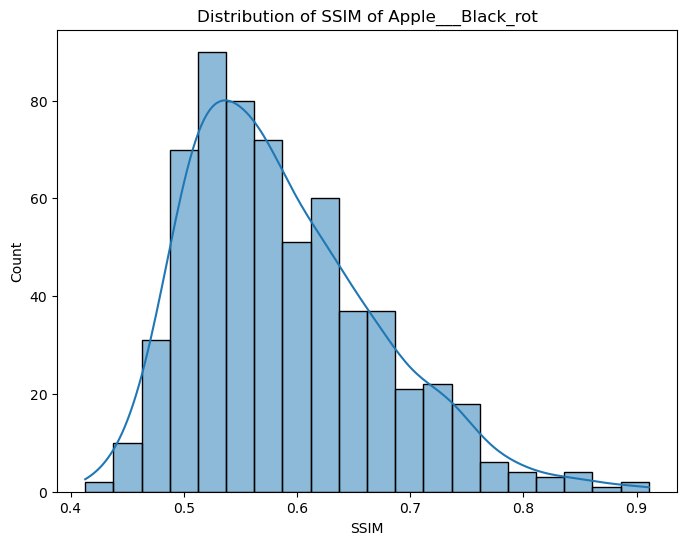

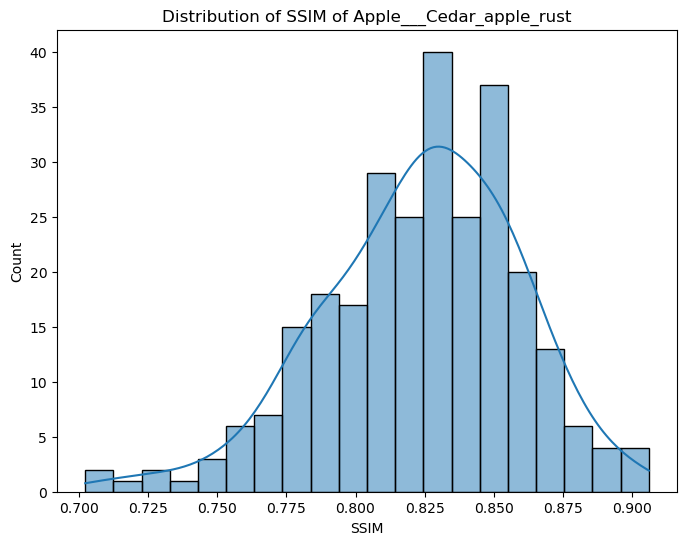

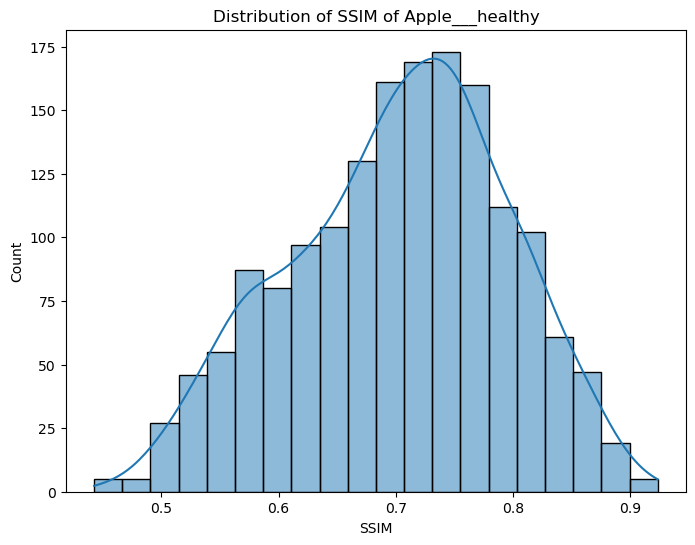

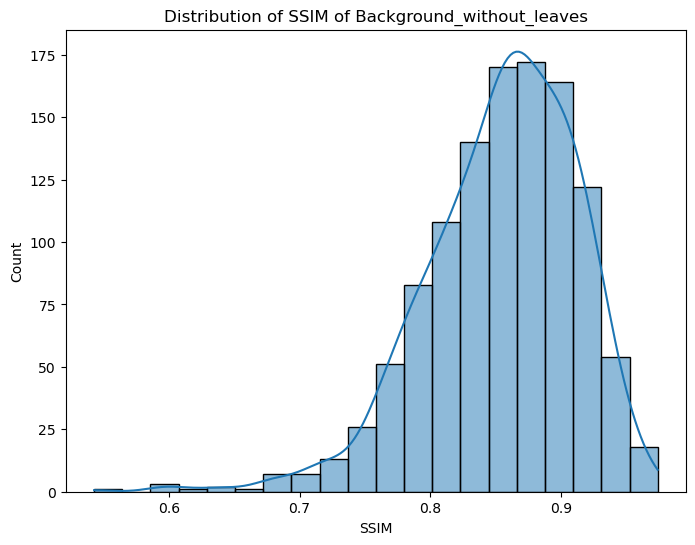

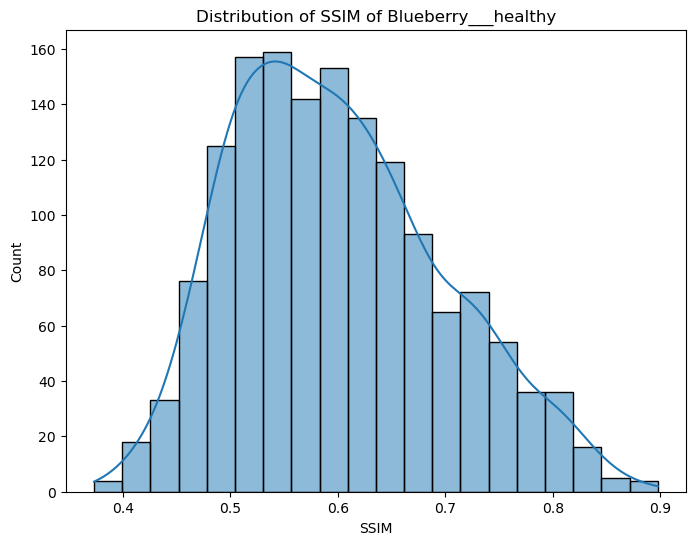

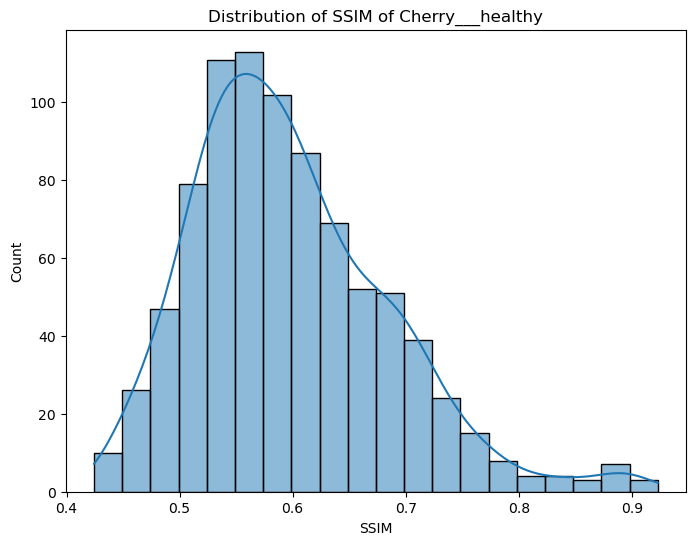

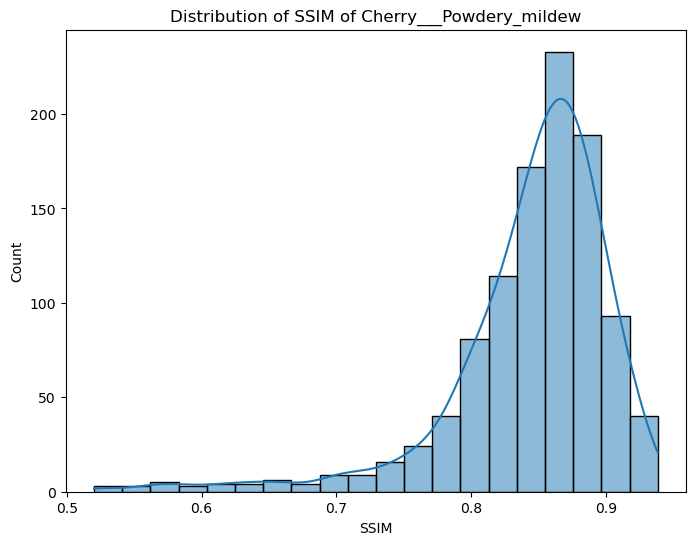

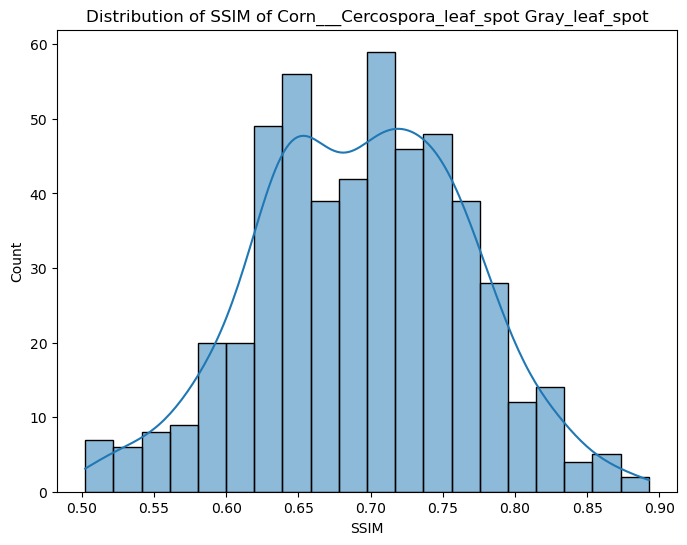

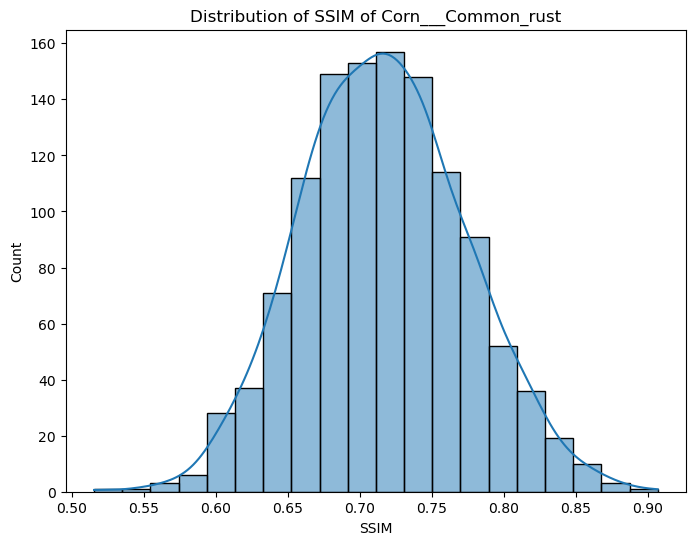

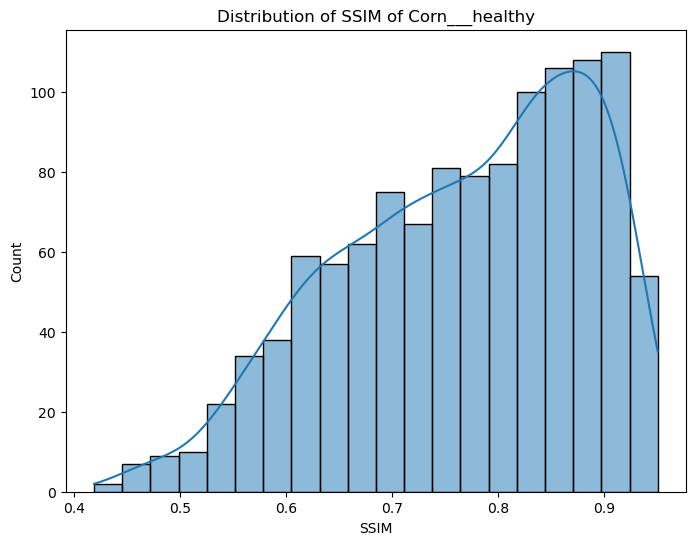

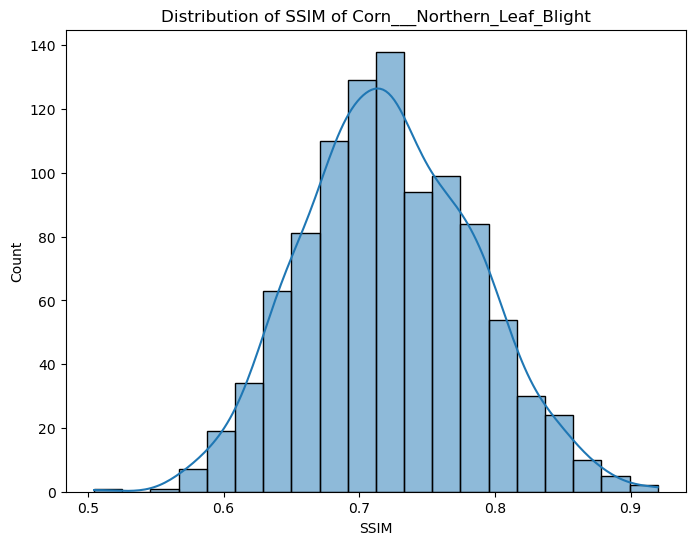

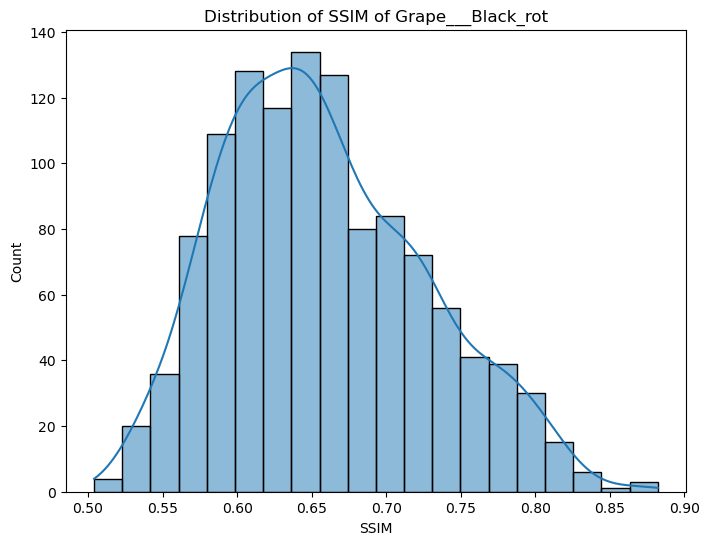

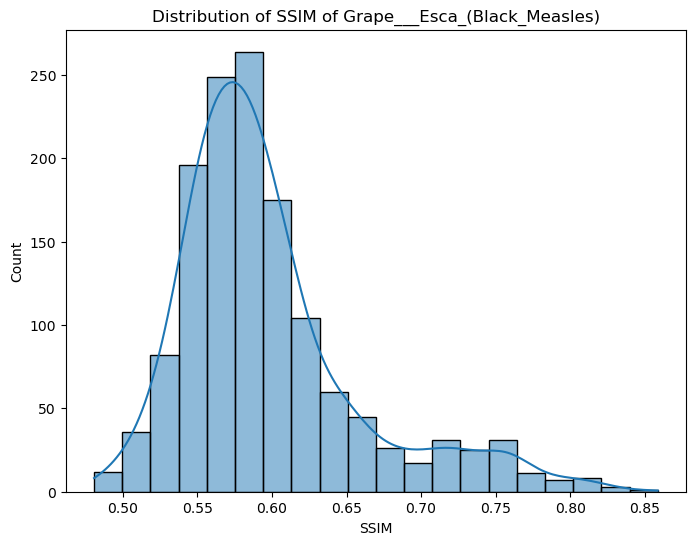

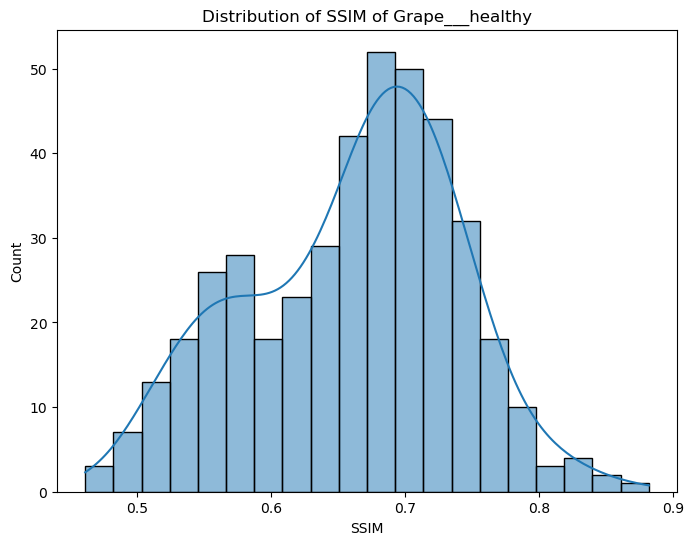

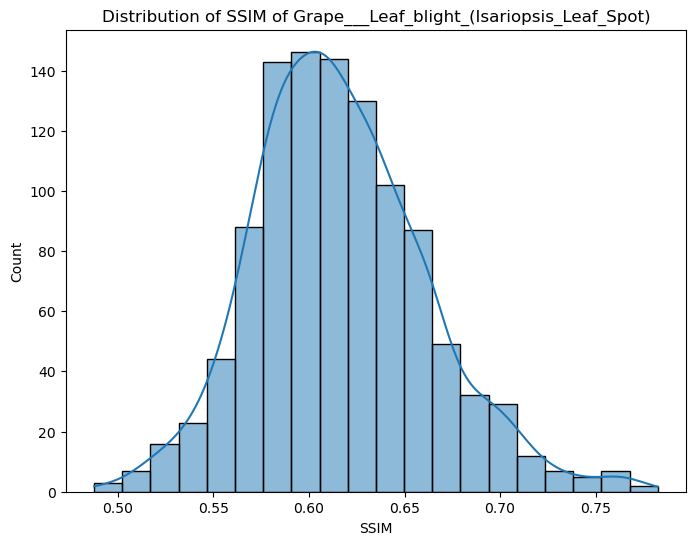

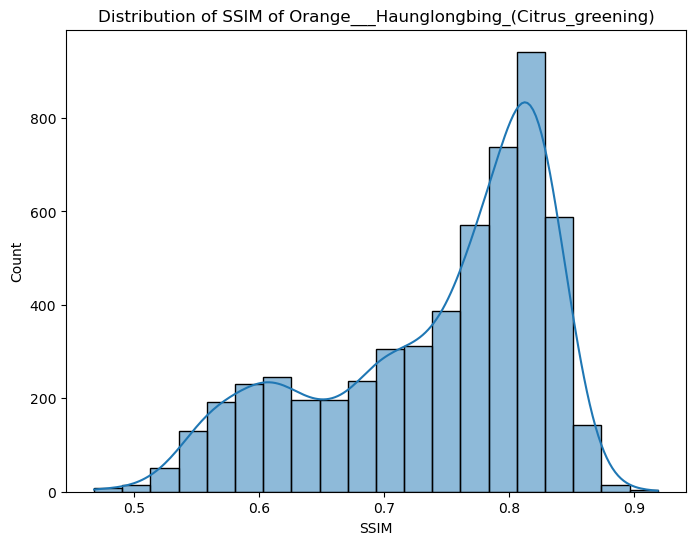

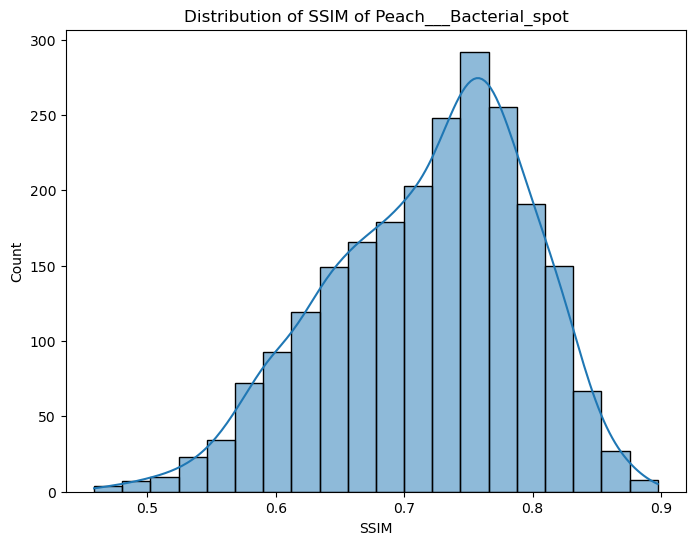

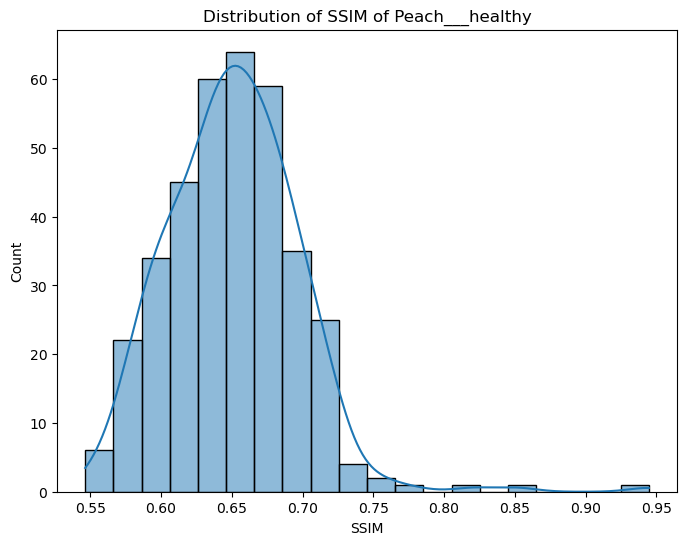

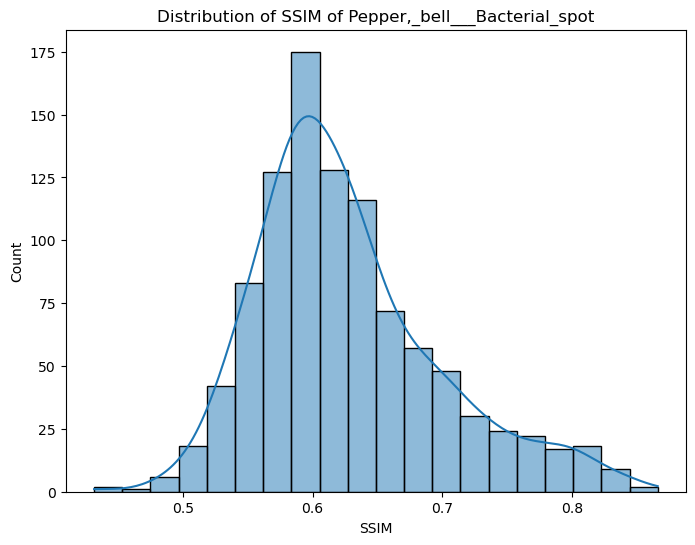

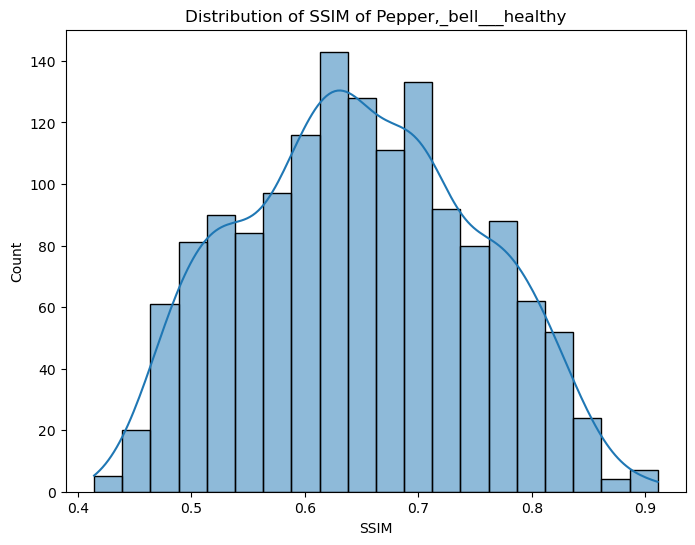

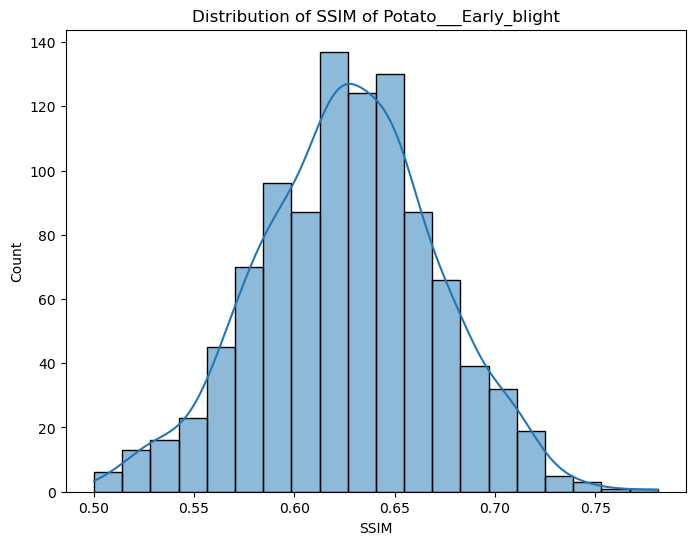

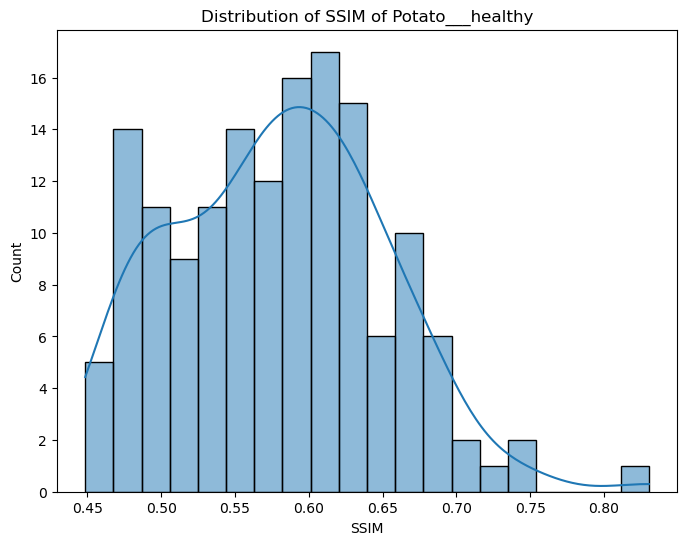

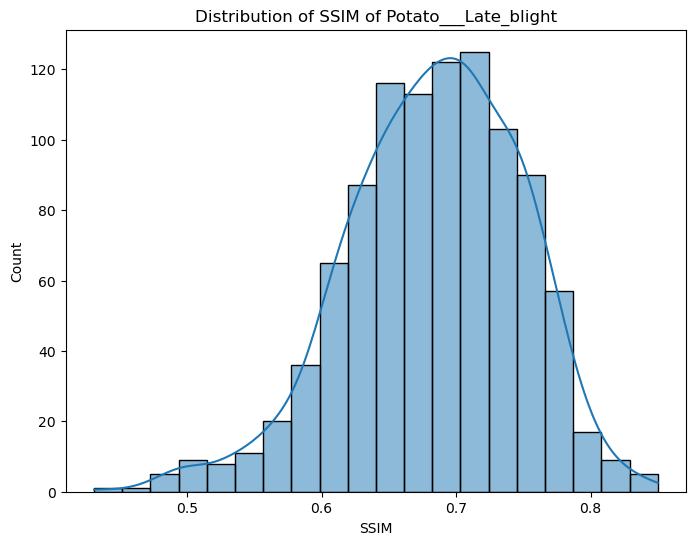

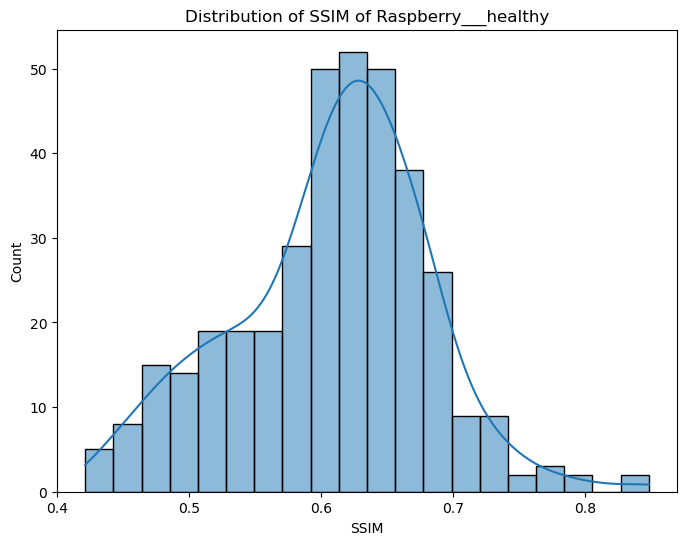

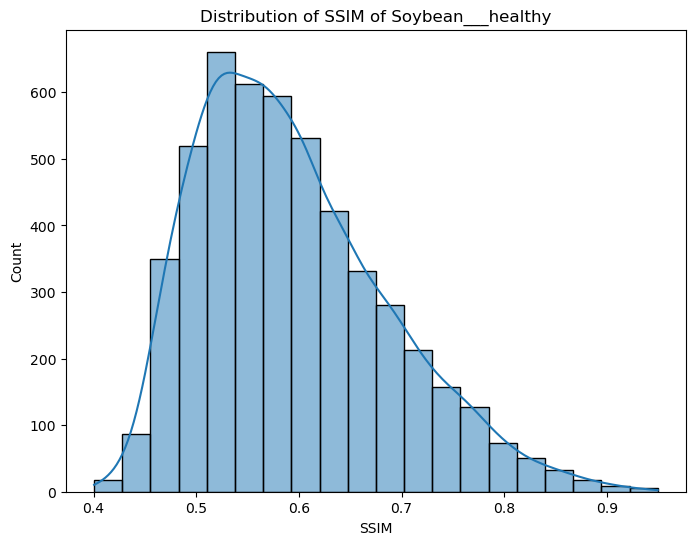

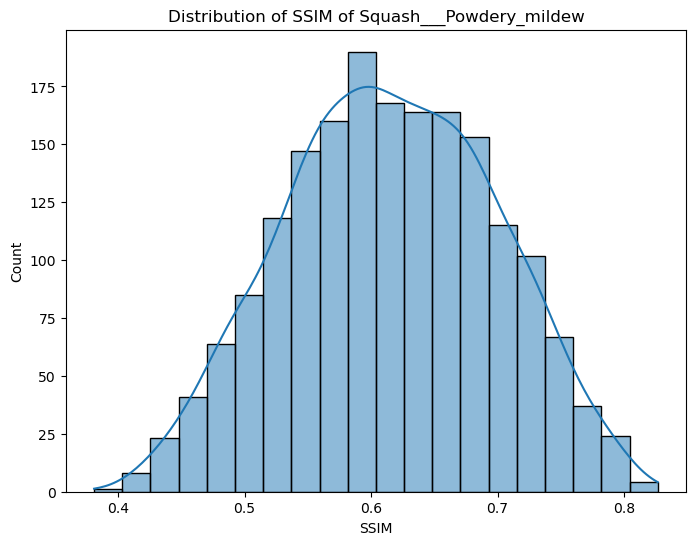

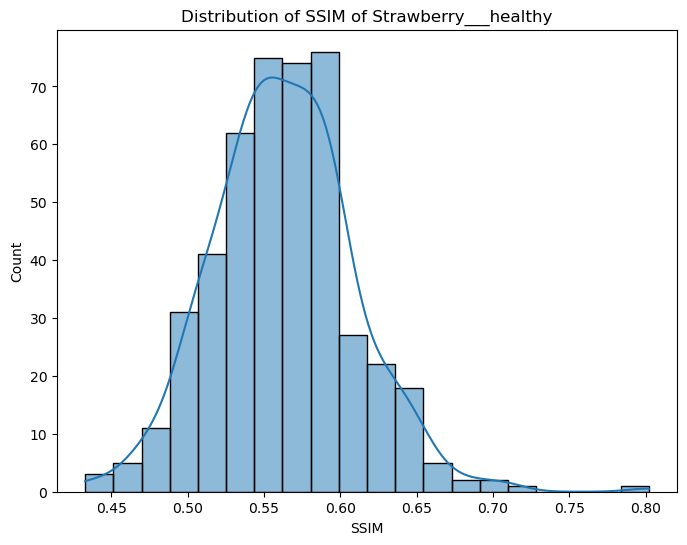

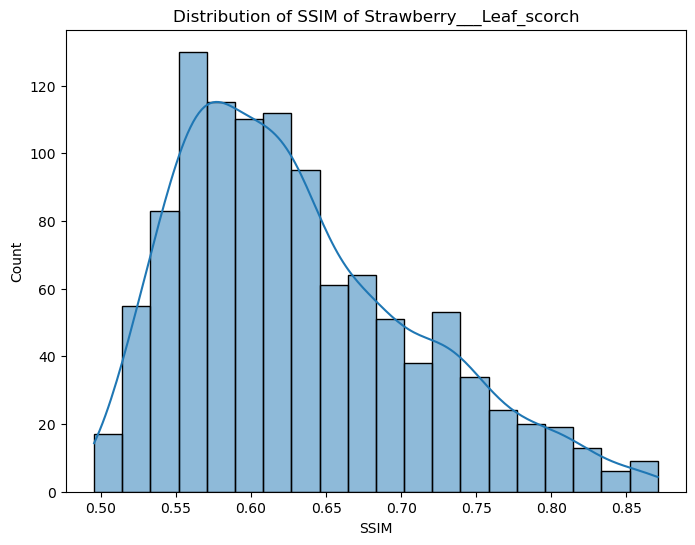

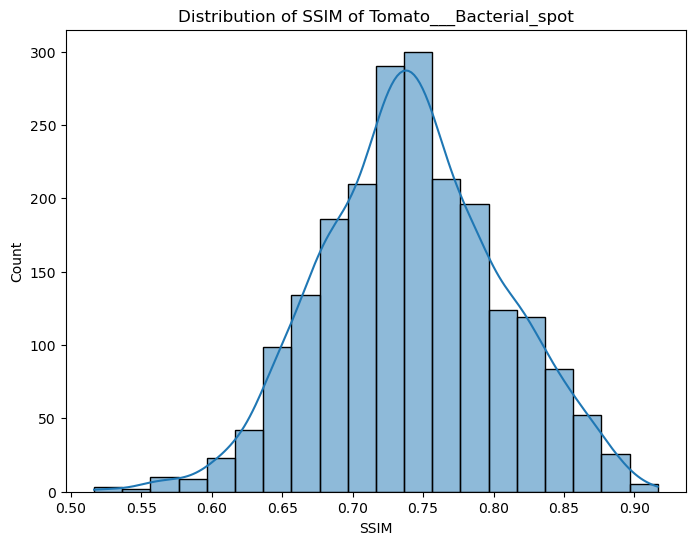

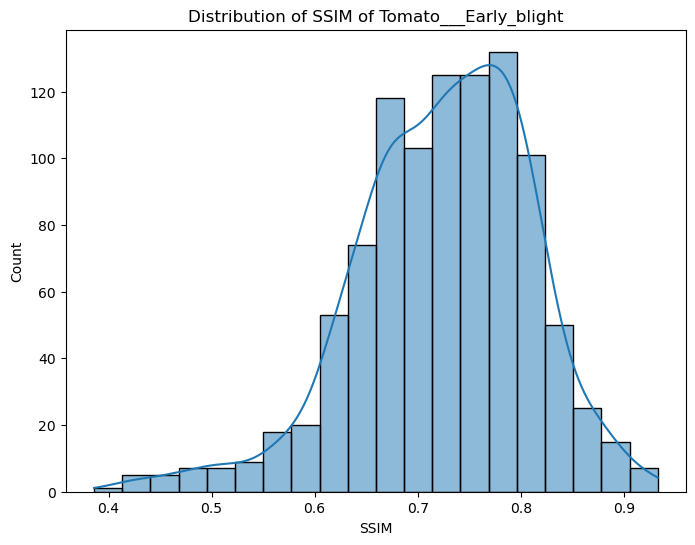

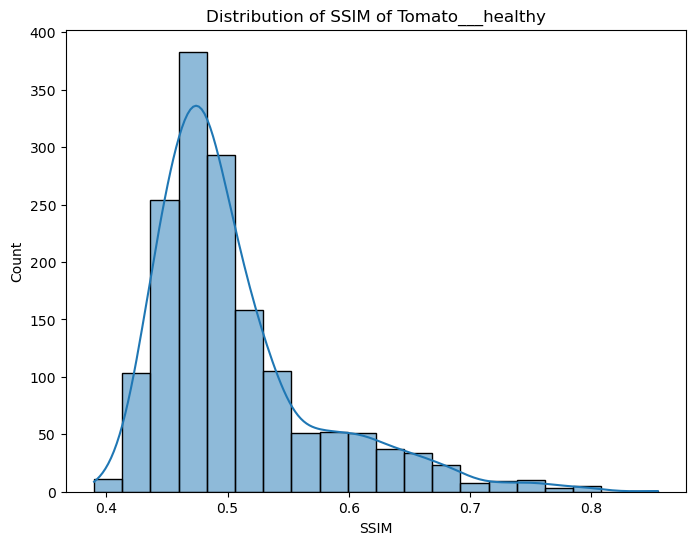

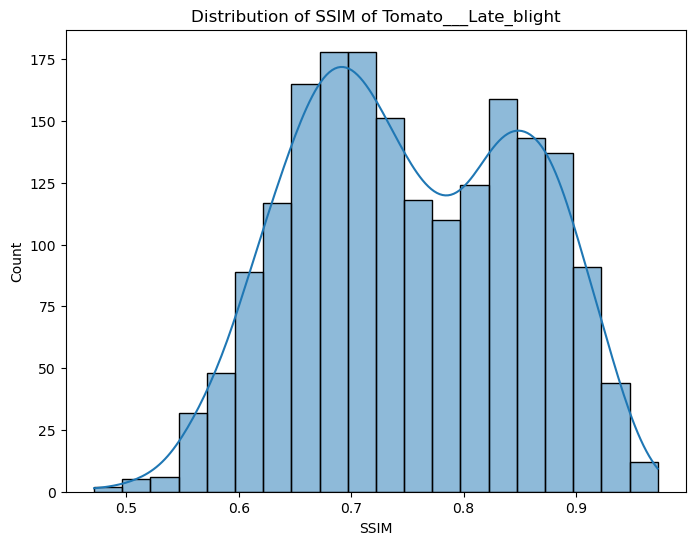

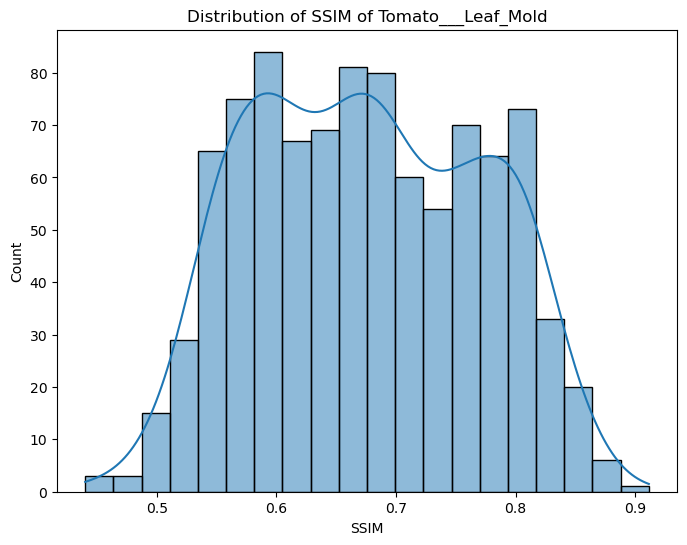

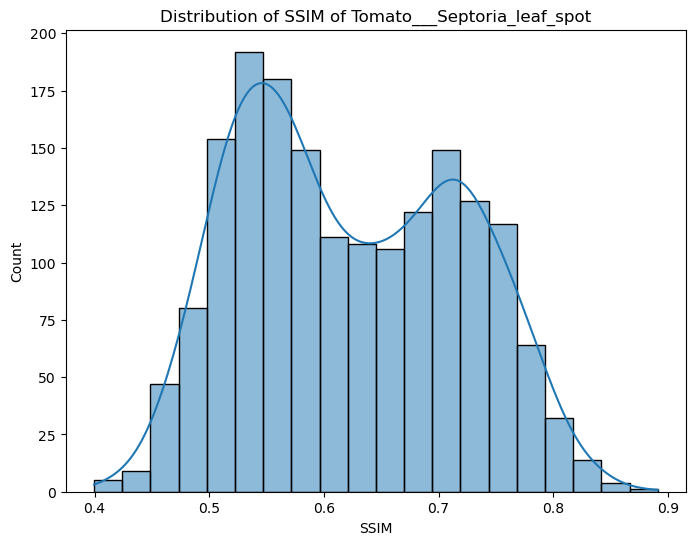

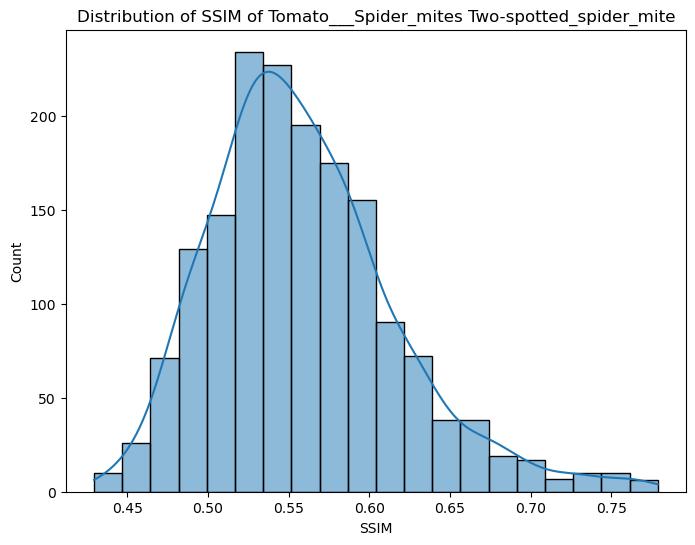

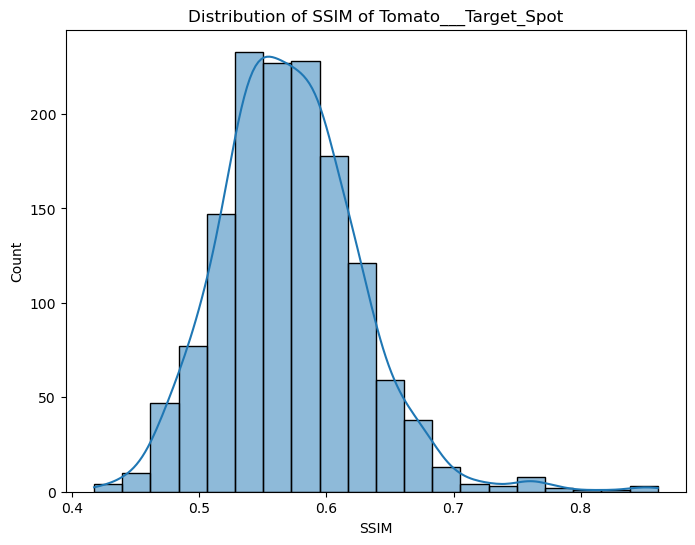

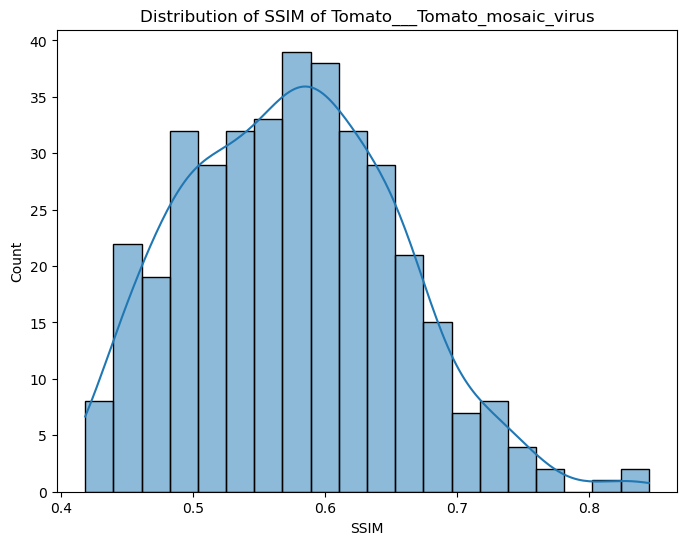

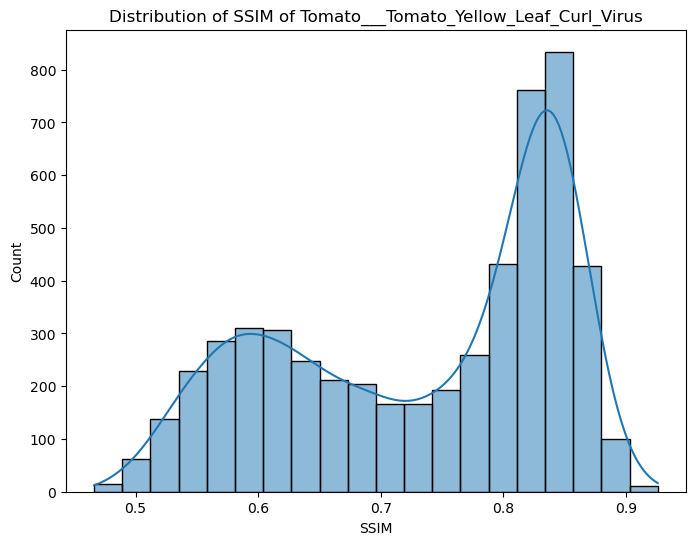

In [52]:
for item in ppg_ssim_dict.keys():
    plt.figure(figsize=(8, 6))
    sns.histplot(ppg_ssim_dict[item], label = item, kde = True, alpha = 0.5, bins = 20)
    plt.title(f'Distribution of SSIM of {item}')
    plt.xlabel('SSIM')
    plt.show()

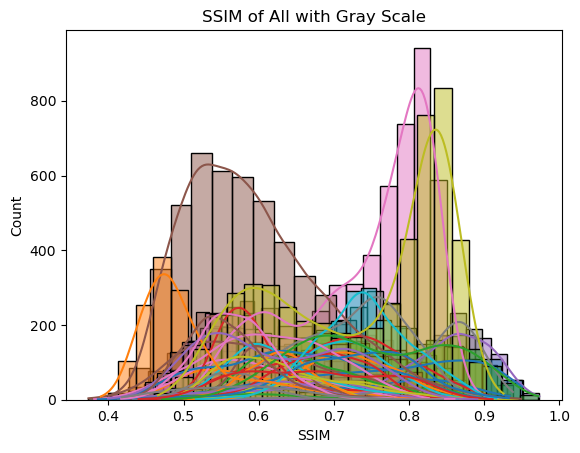

In [54]:
for item in ppg_ssim_dict.keys():
    sns.histplot(ppg_ssim_dict[item], label = item, kde = True, alpha = 0.5, bins = 20)
plt.title('SSIM of All with Gray Scale')
plt.xlabel('SSIM')
plt.show()

## 2.4. Summary
* The pre-processing can keep the majority key features of original images, SSIM above 0.5.
* Changing to gray scale doesn't change the image structures much.
* To fully evaluate the impact of pre-processing, build models with different pre-processing and without pre-processing.